## Loading Dependencies

In [1]:
!pip install gmplot
!pip install folium


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 3.8 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import matplotlib.cm as cm
from scipy import stats
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline

from sklearn.cluster import DBSCAN

import gmplot
import folium
import geopandas as gpd
from shapely.geometry import Point


#from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

## Loading Data

In [ ]:
data = {'95m': 'https://drive.google.com/file/d/1ukYfAD9sdDNfw9lz4CocN5Gk7C7SCeCy/view?usp=drive_link',
        '206m': 'https://drive.google.com/file/d/1sYU22Cw3DG7wycjYQw12mSBf5DThFwob/view?usp=drive_link',
        '310m': 'https://drive.google.com/file/d/1sIwCPblFYbBPIPE7sWFwoJDzrnvl_-J3/view?usp=drive_link'
        }

In [ ]:
url_95 = 'https://drive.google.com/file/d/1ukYfAD9sdDNfw9lz4CocN5Gk7C7SCeCy/view?usp=drive_link'
url_95_id = 'https://drive.google.com/uc?id=' + url_95.split('/')[-2]

#url_206 = 'https://drive.google.com/file/d/1sYU22Cw3DG7wycjYQw12mSBf5DThFwob/view?usp=drive_link'
#url_206_id = 'https://drive.google.com/uc?id=' + url_206.split('/')[-2]

url_310 = 'https://drive.google.com/file/d/1sIwCPblFYbBPIPE7sWFwoJDzrnvl_-J3/view?usp=drive_link'
url_310_id = 'https://drive.google.com/uc?id=' + url_310.split('/')[-2]


In [ ]:
df_95 = pd.read_csv(url_95_id)
#df_206 = pd.read_csv('https://drive.usercontent.google.com/download?id=1sYU22Cw3DG7wycjYQw12mSBf5DThFwob&authuser=0')
df_310 = pd.read_csv(url_310_id)

In [ ]:
df_95_clean_1 = df_95.drop(columns=['ActivityType', 'ActivityConfidence', 'Pressure(kilopascals)', 'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)'])
df_310_clean_1 = df_310.drop(columns=['ActivityType', 'ActivityConfidence', 'Pressure(kilopascals)', 'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)'])

In [ ]:
df_95_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5717 entries, 0 to 5716
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 5717 non-null   object 
 1   accelX(g)                 5717 non-null   float64
 2   accelY(g)                 5717 non-null   float64
 3   accelZ(g)                 5717 non-null   float64
 4   accelUserX(g)             5717 non-null   float64
 5   accelUserY(g)             5717 non-null   float64
 6   accelUserZ(g)             5717 non-null   float64
 7   gyroX(rad/s)              5717 non-null   float64
 8   gyroY(rad/s)              5717 non-null   float64
 9   gyroZ(rad/s)              5717 non-null   float64
 10  m11                       5717 non-null   float64
 11  m12                       5717 non-null   float64
 12  m13                       5717 non-null   float64
 13  m21                       5717 non-null   float64
 14  m22     

In [ ]:
df_310_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18577 entries, 0 to 18576
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 18577 non-null  object 
 1   accelX(g)                 18577 non-null  float64
 2   accelY(g)                 18577 non-null  float64
 3   accelZ(g)                 18577 non-null  float64
 4   accelUserX(g)             18577 non-null  float64
 5   accelUserY(g)             18577 non-null  float64
 6   accelUserZ(g)             18577 non-null  float64
 7   gyroX(rad/s)              18577 non-null  float64
 8   gyroY(rad/s)              18577 non-null  float64
 9   gyroZ(rad/s)              18577 non-null  float64
 10  m11                       18577 non-null  float64
 11  m12                       18577 non-null  float64
 12  m13                       18577 non-null  float64
 13  m21                       18577 non-null  float64
 14  m22   

In [ ]:
df_95_clean_1.shape

(5717, 38)

In [ ]:
df_310_clean_1.shape

(18577, 38)

In [ ]:
# Check for duplicates
duplicate_ids = (df_310_clean_1["Timestamp"].value_counts() > 1).sum()
duplicate_ids

0

In [ ]:
# 'Timestamp' is the column to convert
df_95_clean_1['Timestamp'] = pd.to_datetime(df_95_clean_1['Timestamp'])

# Display the first few rows to verify the conversion
print(df_95_clean_1['Timestamp'].head())


0   2023-04-07 09:13:51.953
1   2023-04-07 09:13:52.957
2   2023-04-07 09:13:53.961
3   2023-04-07 09:13:54.965
4   2023-04-07 09:13:55.969
Name: Timestamp, dtype: datetime64[ns]


In [ ]:
# 'Timestamp' is the column to convert
df_310_clean_1['Timestamp'] = pd.to_datetime(df_310_clean_1['Timestamp'])

# Display the first few rows to verify the conversion
print(df_310_clean_1['Timestamp'].head())


0   2023-04-08 08:25:39.548
1   2023-04-08 08:25:40.552
2   2023-04-08 08:25:41.555
3   2023-04-08 08:25:42.559
4   2023-04-08 08:25:43.563
Name: Timestamp, dtype: datetime64[ns]


In [ ]:
# Removing NaN values
df_95_clean_1.dropna(inplace=True)
df_95_clean_1.shape

(5717, 38)

In [ ]:
# Removing NaN values
df_310_clean_1.dropna(inplace=True)
df_310_clean_1.shape

(18577, 38)

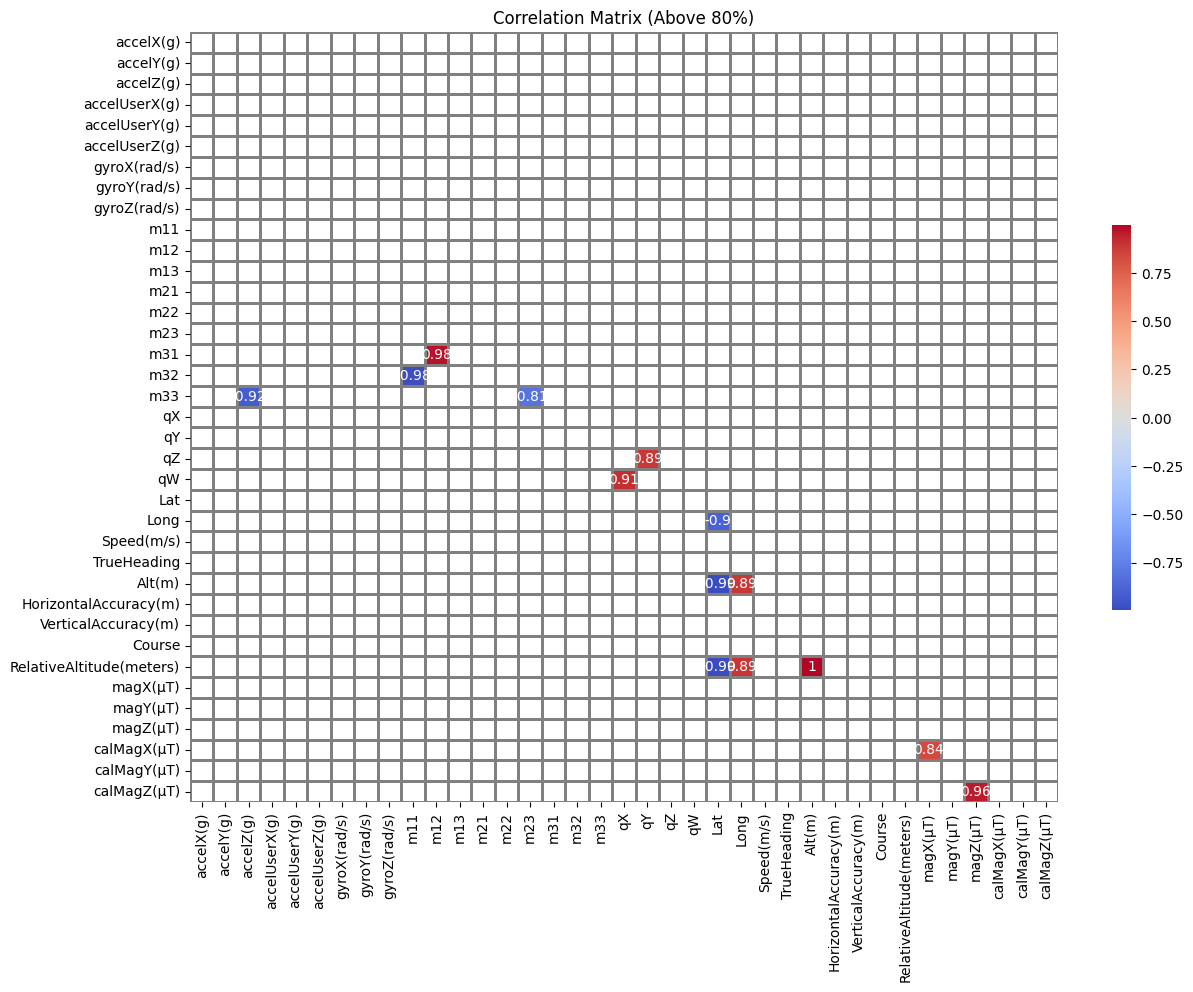

In [ ]:
# correlation matrix with 38 features
corr_matrix = df_95_clean_1.corr()

# Create a mask for the upper triangle and for correlations below 0.8 in absolute value
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) | (np.abs(corr_matrix) < 0.8)

plt.figure(figsize=(14, 10))
# Adjust linewidths and linecolor for better readability
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', linewidths=1, linecolor='gray', cbar_kws={"shrink": .5})
plt.title('Correlation Matrix (Above 80%)')
plt.show()

In [ ]:
df_95_clean_1.describe()

accelX(g)    accelY(g)    accelZ(g)  accelUserX(g)  accelUserY(g)  \
count  5717.000000  5717.000000  5717.000000    5717.000000    5717.000000   
mean      0.090931    -0.919209    -0.059333       0.000045      -0.020865   
std       0.245091     0.256684     0.361780       0.235390       0.203535   
min      -1.110900    -2.621500    -1.660700      -1.495500      -1.833100   
25%      -0.017000    -0.997200    -0.139600      -0.023700      -0.021600   
50%       0.076200    -0.969100     0.064900      -0.000500      -0.000100   
75%       0.181900    -0.897800     0.169900       0.021500       0.019400   
max       2.189300     0.507700     0.960900       2.109800       1.154700   

       accelUserZ(g)  gyroX(rad/s)  gyroY(rad/s)  gyroZ(rad/s)          m11  \
count    5717.000000   5717.000000   5717.000000   5717.000000  5717.000000   
mean        0.005933      0.019539      0.013699      0.010264     0.019853   
std         0.142512      0.306080      0.468037      0.284150     0.644952   
min        -1.202800     -2.880500     -3.112300     -5.427900    -1.000000   
25%        -0.017400     -0.049300     -0.096000     -0.047400    -0.573800   
50%         0.000600      0.008400      0.004200      0.006900     0.112600   
75%         0.022700      0.074600      0.115900      0.061400     0.630300   
max         1.096100      4.573000      8.225200      2.010600     0.999600   

       ...  HorizontalAccuracy(m)  VerticalAccuracy(m)       Course  \
count  ...            5717.000000          5717.000000  5717.000000   
mean   ...               7.021917             3.338464   157.226482   
std    ...               8.783300             1.218085   109.996772   
min    ...               4.500000             1.900000    -1.000000   
25%    ...               4.700000             3.200000    59.000000   
50%    ...               4.700000             3.400000   153.800000   
75%    ...               5.000000             3.400000   237.500000   
max    ...             150.300000            32.000000   360.000000   

       RelativeAltitude(meters)     magX(µT)     magY(µT)     magZ(µT)  \
count               5717.000000  5717.000000  5717.000000  5717.000000   
mean                 785.844389  -131.298608    45.105683   -48.237798   
std                  499.393834    19.628722    11.229571    22.859260   
min                   -3.038600  -212.177800   -17.868600  -140.709000   
25%                  557.447600  -143.933700    37.458000   -66.097400   
50%                  784.637000  -128.455400    44.623000   -49.275600   
75%                 1222.585400  -116.241800    52.210600   -30.389200   
max                 1532.764900   -79.923300   152.416700    22.013500   

       calMagX(µT)  calMagY(µT)  calMagZ(µT)  
count  5717.000000  5717.000000  5717.000000  
mean     -9.708961    -5.911841     2.746117  
std      24.940830    26.786143    25.649104  
min     -79.455800   -91.693800   -95.045900  
25%     -27.275400   -32.522400   -17.726500  
50%      -8.931500     2.560000     1.618800  
75%      10.768800    17.824200    20.261200  
max      48.409400    78.647200    77.846900  

[8 rows x 37 columns]

In [ ]:
df_310_clean_1.describe()

accelX(g)     accelY(g)     accelZ(g)  accelUserX(g)  accelUserY(g)  \
count  18577.000000  18577.000000  18577.000000   18577.000000   18577.000000   
mean      -0.016706     -0.655944     -0.269638      -0.001637      -0.010541   
std        0.266119      0.448312      0.544837       0.181844       0.176151   
min       -2.420700     -7.203900     -2.070000      -2.501000      -6.108600   
25%       -0.157500     -0.977200     -0.985700      -0.008900      -0.008400   
50%       -0.002900     -0.899200     -0.056000       0.000000       0.000500   
75%        0.046100     -0.051800      0.153500       0.009000       0.009800   
max        2.012500      1.358200      1.370500       1.765900       1.471700   

       accelUserZ(g)  gyroX(rad/s)  gyroY(rad/s)  gyroZ(rad/s)           m11  \
count   18577.000000  18577.000000  18577.000000  18577.000000  18577.000000   
mean        0.003175      0.016275      0.000025      0.008561      0.115618   
std         0.112715      0.267634      0.374185      0.244875      0.685504   
min        -1.616800     -4.679000     -7.883100     -7.827000     -1.000000   
25%        -0.007100     -0.014800     -0.030900     -0.011500     -0.548900   
50%         0.005400      0.008400      0.002800      0.006600      0.400200   
75%         0.012000      0.034900      0.035200      0.024600      0.698900   
max         1.078600      5.257900      9.082000      3.378600      1.000000   

       ...  HorizontalAccuracy(m)  VerticalAccuracy(m)        Course  \
count  ...           18577.000000         18577.000000  18577.000000   
mean   ...              13.646827             3.745416    124.040389   
std    ...              83.016428             4.885424    104.569938   
min    ...               3.500000             1.800000     -1.000000   
25%    ...               4.700000             2.700000     13.100000   
50%    ...               4.700000             3.400000    133.700000   
75%    ...               6.600000             3.400000    192.100000   
max    ...            1451.000000            96.000000    360.000000   

       RelativeAltitude(meters)      magX(µT)      magY(µT)      magZ(µT)  \
count              18577.000000  18577.000000  18577.000000  18577.000000   
mean                  71.386360   -122.548014     45.746227    -60.543227   
std                  371.399656     15.819479     21.837126     26.037290   
min                 -615.866700   -255.681500   -103.715900   -332.507400   
25%                  -16.535600   -132.497000     32.355300    -89.195700   
50%                   72.233000   -122.420400     43.210500    -57.531600   
75%                  183.062600   -111.351100     57.547200    -41.609400   
max                  940.013100    -26.863500    218.471700    231.996400   

        calMagX(µT)   calMagY(µT)   calMagZ(µT)  
count  18577.000000  18577.000000  18577.000000  
mean       2.866425    -24.001580    -12.416442  
std       16.249929     19.506716     24.583221  
min     -130.865200   -171.097500   -278.351200  
25%       -7.626500    -36.773200    -37.971100  
50%        3.272000    -25.157100    -10.249600  
75%       14.129700    -15.808800      5.232000  
max       98.020600    146.638300    277.366200  

[8 rows x 37 columns]

In [ ]:
# Scaling the features before plotting
numeric_cols = df_310_clean_1.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_310_clean_1[numeric_cols])
df_scaled_numeric = pd.DataFrame(scaled_features, columns=numeric_cols)
df_scaled = df_310_clean_1.copy()
df_scaled[numeric_cols] = df_scaled_numeric


Text(0.5, 0.98, 'Histograms of Numeric Features')

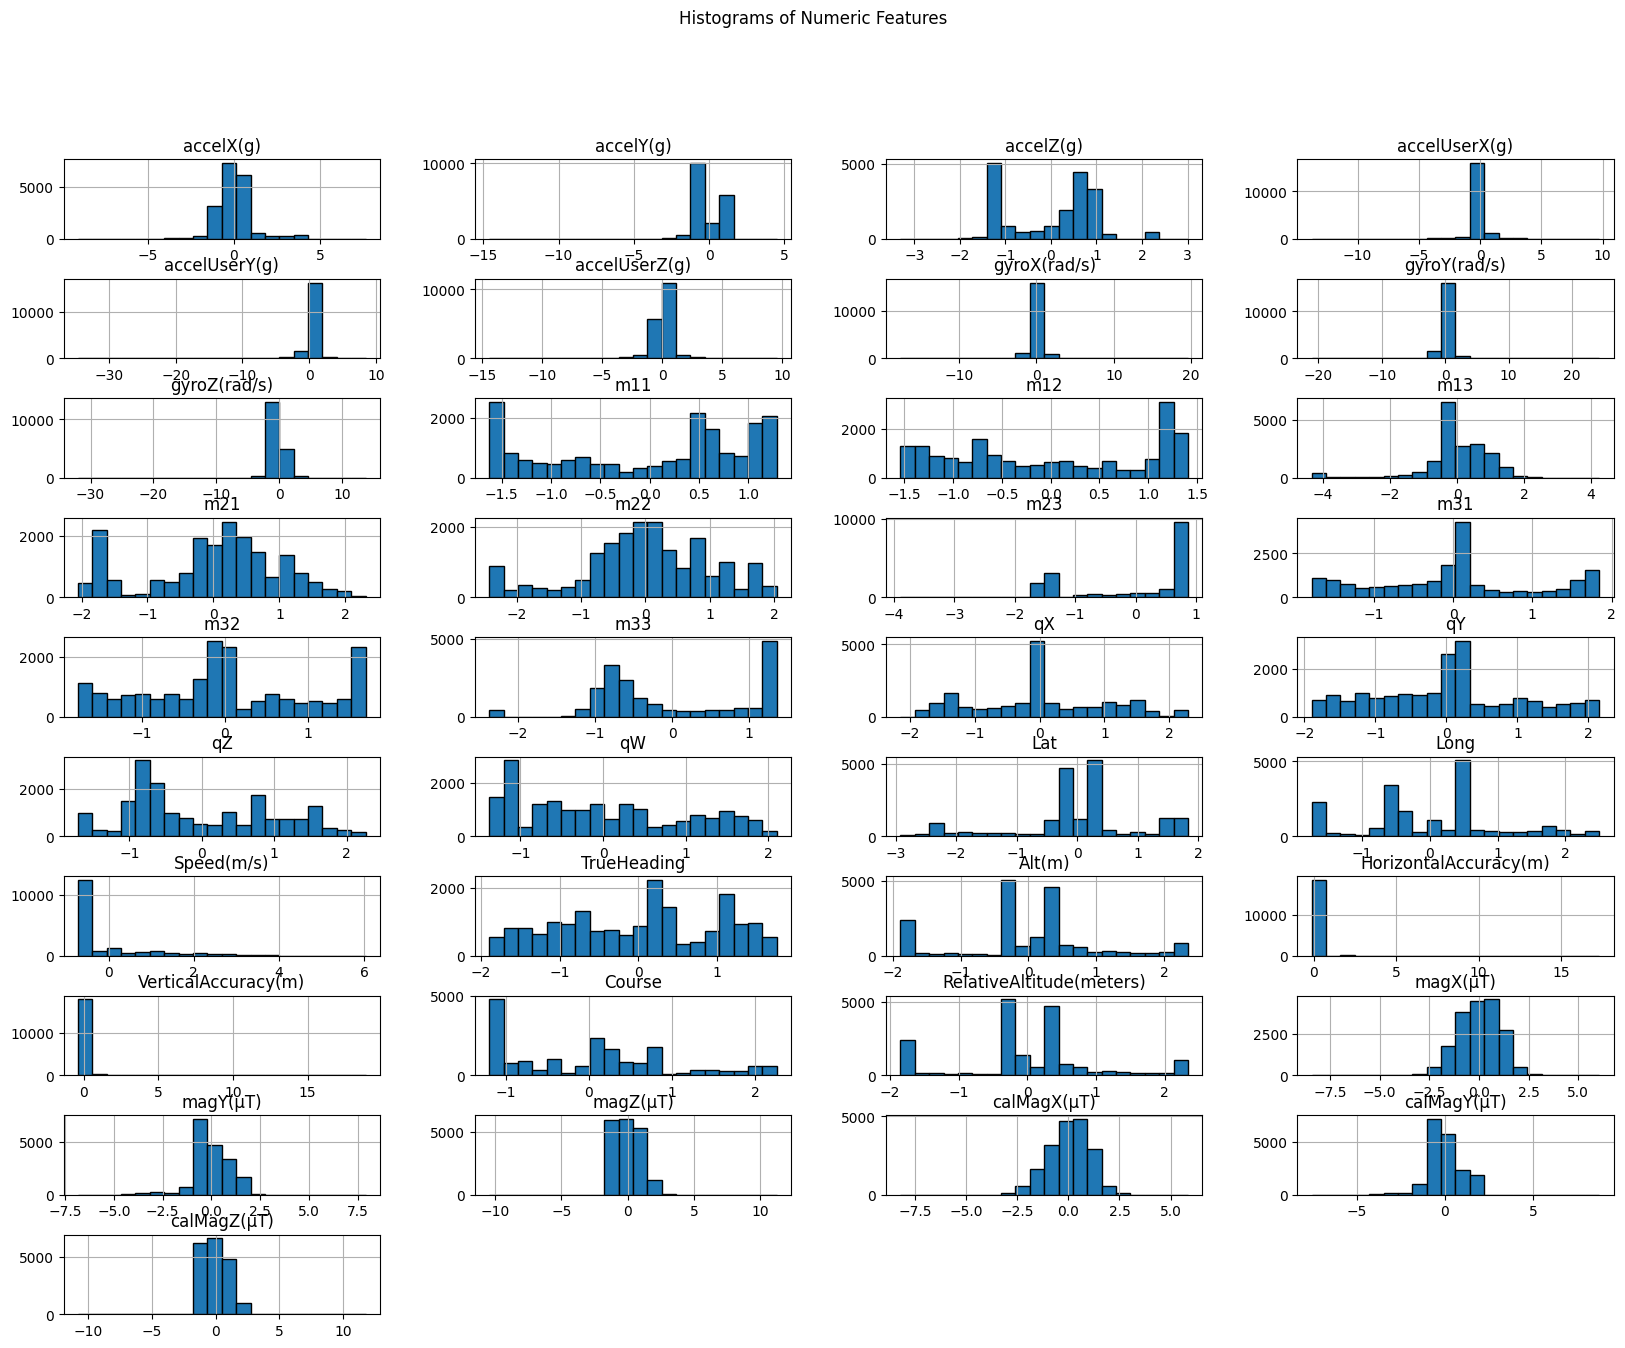

In [ ]:
# Select and plot histograms for numeric columns
numeric_cols = df_scaled.select_dtypes(include=[np.number])
numeric_cols.hist(figsize=(20, 15), bins=20, edgecolor='black', layout=(-1, 4))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle('Histograms of Numeric Features')


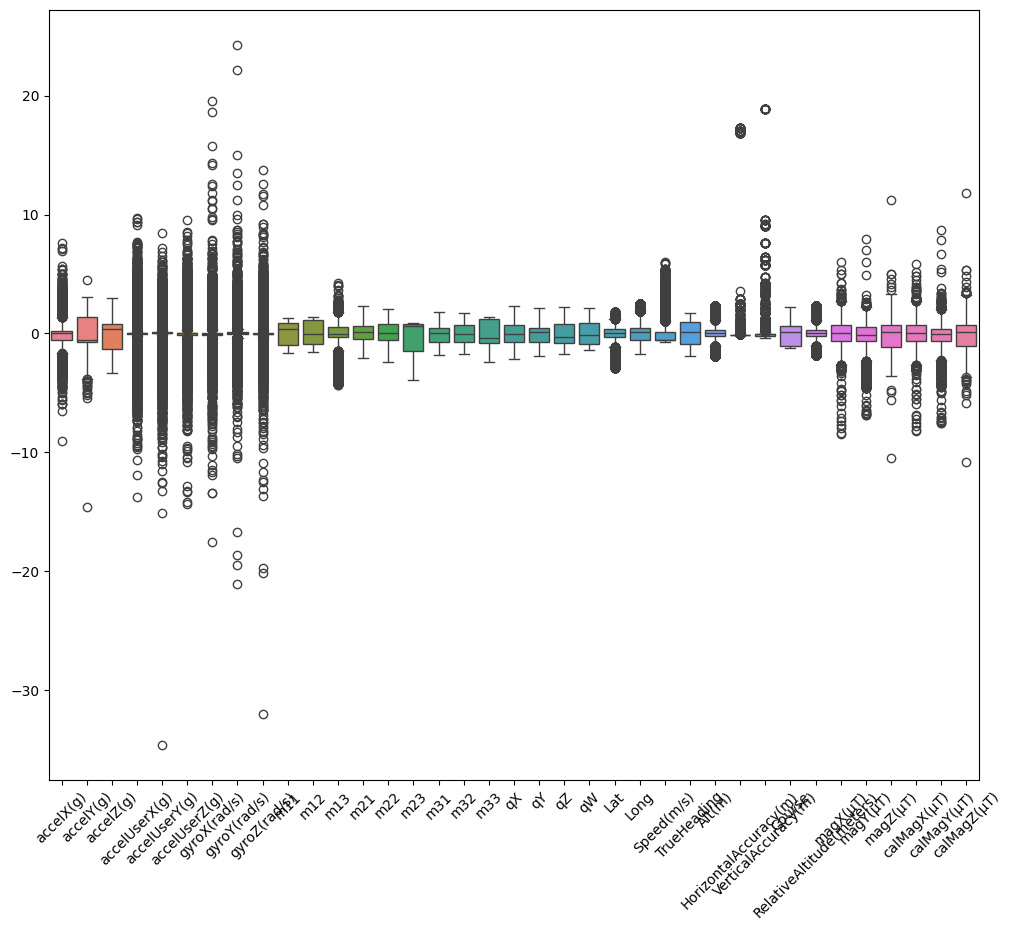

In [ ]:
# Boxplots for each feature
plt.figure(figsize=(12, 10))
ax = sns.boxplot(data=df_scaled)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
df_95_clean_1['GPS_Point'] = df_95_clean_1.apply(lambda row: (row['Lat'], row['Long']), axis=1)


In [ ]:
df_310_clean_1['GPS_Point'] = df_310_clean_1.apply(lambda row: (row['Lat'], row['Long']), axis=1)


In [ ]:

# reduce GPS data redundancy

# Coordinate system
crs = {'init': 'epsg:4326'}

# Create GPS points
geometry = [Point(xy) for xy in zip(df_95_clean_1['Long'], df_95_clean_1['Lat'])]

# Create a GeoDataFrame with GPS data points
geo_df = gpd.GeoDataFrame(df_95_clean_1, crs=crs, geometry=geometry)

# Reduce data to every 60 seconds
reduced_df = df_95_clean_1.iloc[::60, :]
reduced_df.head(5)


Timestamp  accelX(g)  accelY(g)  accelZ(g)  accelUserX(g)  \
0   2023-04-07 09:13:51.953     0.1534    -0.5180    -0.8395        -0.0108   
60  2023-04-07 09:14:52.171     0.3344    -0.9432    -0.0029         0.0060   
120 2023-04-07 09:15:52.449     0.0013    -0.9620     0.2815         0.0006   
180 2023-04-07 09:16:52.684     0.1688    -0.9850    -0.0392         0.0074   
240 2023-04-07 09:17:52.917     0.1375    -0.9856     0.0784        -0.0032   

     accelUserY(g)  accelUserZ(g)  gyroX(rad/s)  gyroY(rad/s)  gyroZ(rad/s)  \
0           0.0025        -0.0101        0.0166        0.0051        0.0318   
60          0.0012        -0.0019        0.0194        0.0126        0.0009   
120        -0.0027        -0.0001        0.0120        0.0126        0.0057   
180        -0.0016         0.0130       -0.1113        0.0775        0.0019   
240         0.0007        -0.0033        0.0176        0.0069        0.0043   

     ...  VerticalAccuracy(m)  Course  RelativeAltitude(meters)  magX(µT)  \
0    ...                  3.9    -1.0                   -0.0343 -135.5536   
60   ...                  4.0   250.7                   -0.1110 -126.4339   
120  ...                  3.9    -1.0                    0.0317 -148.6366   
180  ...                  3.1   309.1                    0.4995 -136.7523   
240  ...                  2.5   301.3                    0.5787 -141.2032   

     magY(µT)  magZ(µT)  calMagX(µT)  calMagY(µT)  calMagZ(µT)  \
0     36.2744  -65.9999     -27.1108       6.9614      -7.9447   
60    41.1285  -19.2279     -18.0433      11.7303      38.8136   
120   49.1979  -14.9964     -40.1529      19.8236      43.0206   
180   53.7641  -40.6563     -28.1361      24.2137      17.3041   
240   53.8542  -36.7404     -32.8145      24.4177      21.1327   

                 GPS_Point  
0    (46.632262, 8.592034)  
60   (46.632029, 8.591655)  
120  (46.632268, 8.591821)  
180  (46.632458, 8.591911)  
240  (46.632506, 8.591954)  

[5 rows x 39 columns]

In [ ]:

# reduce GPS data redundancy
# Coordinate system
crs1 = {'init': 'epsg:4326'}

# Create GPS points
geometry1 = [Point(xy) for xy in zip(df_310_clean_1['Long'], df_310_clean_1['Lat'])]

# Create a GeoDataFrame with GPS data points
geo_df1 = gpd.GeoDataFrame(df_310_clean_1, crs=crs1, geometry=geometry1)

# Reduce data to every 60 seconds
reduced_df1 = df_310_clean_1.iloc[::60, :]
reduced_df1.head(5)


Timestamp  accelX(g)  accelY(g)  accelZ(g)  accelUserX(g)  \
0   2023-04-08 08:25:39.548     0.1469    -0.5016    -0.6164        -0.0205   
60  2023-04-08 08:26:39.777     0.1774    -1.0081    -0.0006         0.0331   
120 2023-04-08 08:27:40.012     0.1601    -0.9843    -0.0050        -0.0336   
180 2023-04-08 08:28:40.246     0.0449    -1.1990     0.1265        -0.0183   
240 2023-04-08 08:29:40.480    -0.2048    -0.9578     0.0976        -0.0848   

     accelUserY(g)  accelUserZ(g)  gyroX(rad/s)  gyroY(rad/s)  gyroZ(rad/s)  \
0           0.0419         0.2105       -0.2433       -0.1863        0.1109   
60         -0.0181         0.0052        0.0158       -0.0254        0.0461   
120        -0.0033         0.0001        0.0288        0.0545        0.0164   
180        -0.1775         0.0816        0.1281        0.5214        0.0546   
240         0.0284         0.0005        0.1450       -0.1586       -0.0550   

     ...  VerticalAccuracy(m)  Course  RelativeAltitude(meters)  magX(µT)  \
0    ...                  8.0   164.5                    5.7839 -129.5258   
60   ...                  3.8   161.9                  136.0741 -111.4205   
120  ...                  3.4    -1.0                  185.6176 -116.5995   
180  ...                  3.4   138.2                  185.7789 -145.2458   
240  ...                  3.4   260.2                  186.0087 -125.1113   

     magY(µT)  magZ(µT)  calMagX(µT)  calMagY(µT)  calMagZ(µT)  \
0     42.1998  -81.2584       2.0595     -32.6295     -32.3720   
60     9.8917  -23.9172      19.9269     -65.9187      25.0146   
120   -5.1248  -12.2614      14.6260     -80.7540      36.6016   
180   30.9614  -43.1888     -14.0955     -44.7643       5.4968   
240   42.2394  -38.5714       5.9725     -33.3980      10.1665   

                 GPS_Point  
0    (46.623842, 8.595877)  
60   (46.619533, 8.597855)  
120  (46.618484, 8.598298)  
180  (46.618197, 8.598399)  
240  (46.618197, 8.598709)  

[5 rows x 39 columns]

In [ ]:
# define the map's center and map zoomed in
gmap = gmplot.GoogleMapPlotter(reduced_df.Lat[0], reduced_df.Long[0], 15)
gmap.plot(reduced_df.Lat, reduced_df.Long)
# html generating
gmap.draw("map.html")


In [ ]:
# define the map's center and map zoomed in
gmap = gmplot.GoogleMapPlotter(reduced_df1.Lat[0], reduced_df1.Long[0], 15)
gmap.plot(reduced_df1.Lat, reduced_df1.Long)
# html generating
gmap.draw("map.html")


In [ ]:

# Create a Folium map centered at the first point
m = folium.Map(location=[reduced_df.Lat.iloc[0], reduced_df.Long.iloc[0]], zoom_start=15)

# Add a line to the map
folium.PolyLine(
    list(zip(reduced_df.Lat, reduced_df.Long)),
    color="blue",
    weight=2.5,
    opacity=1
).add_to(m)

# Display the map
m


In [ ]:

# Create a Folium map centered at the first point
m = folium.Map(location=[reduced_df1.Lat.iloc[0], reduced_df1.Long.iloc[0]], zoom_start=15)

# Add a line to the map
folium.PolyLine(
    list(zip(reduced_df1.Lat, reduced_df1.Long)),
    color="blue",
    weight=2.5,
    opacity=1
).add_to(m)

# Display the map
m


**KMeans**

In [ ]:
# define clusters
num_clusters = 3
# KMean model
features = reduced_df[['Lat', 'Long']].to_numpy()
cluster_labels = KMeans(n_clusters=num_clusters,
                    	random_state=11).fit_predict(features)
# result
print('Unique clusters: ', np.unique(cluster_labels))
print('Clustering accuracy: ', silhouette_score(features,
                                                labels=cluster_labels))

Unique clusters:  [0 1 2]
Clustering accuracy:  0.6578302987889044


In [ ]:
# define clusters
num_clusters1 = 3
# KMean model
features1 = reduced_df1[['Lat', 'Long']].to_numpy()
cluster_labels1 = KMeans(n_clusters=num_clusters1,
                    	random_state=11).fit_predict(features1)
# result
print('Unique clusters1: ', np.unique(cluster_labels1))
print('Clustering accuracy1: ', silhouette_score(features1,
                                                labels=cluster_labels1))

Unique clusters1:  [0 1 2]
Clustering accuracy1:  0.6602756552904023


In [ ]:
# Assuming 'cluster_labels' is your array of cluster labels from KMeans
clusters_series = pd.Series(cluster_labels, name='Cluster')

# Adding the clusters series to your original DataFrame
geo_df['cluster'] = clusters_series

# Now df has an additional column 'Cluster' indicating the cluster label for each row
print(geo_df.head())


                Timestamp  accelX(g)  accelY(g)  accelZ(g)  accelUserX(g)  \
0 2023-04-07 09:13:51.953     0.1534    -0.5180    -0.8395        -0.0108   
1 2023-04-07 09:13:52.957     0.1562    -0.5118    -0.8333        -0.0094   
2 2023-04-07 09:13:53.961     0.1508    -0.5035    -0.8493        -0.0059   
3 2023-04-07 09:13:54.965     0.1604    -0.5134    -0.8229        -0.0070   
4 2023-04-07 09:13:55.969     0.1569    -0.5341    -0.8330         0.0065   

   accelUserY(g)  accelUserZ(g)  gyroX(rad/s)  gyroY(rad/s)  gyroZ(rad/s)  \
0         0.0025        -0.0101        0.0166        0.0051        0.0318   
1         0.0023         0.0054        0.0042        0.0032       -0.0066   
2         0.0053        -0.0014        0.0020        0.0021        0.0225   
3         0.0025         0.0136        0.0594        0.0147        0.0097   
4        -0.0080         0.0061       -0.0024        0.0176        0.0147   

   ...  RelativeAltitude(meters)  magX(µT)  magY(µT)  magZ(µT)  calMagX(µT

In [ ]:
# Assuming 'cluster_labels' is your array of cluster labels from KMeans
clusters_series1 = pd.Series(cluster_labels1, name='Cluster')

# Adding the clusters series to your original DataFrame
geo_df1['cluster'] = clusters_series1

# Now df has an additional column 'Cluster' indicating the cluster label for each row
print(geo_df1.head())


                Timestamp  accelX(g)  accelY(g)  accelZ(g)  accelUserX(g)  \
0 2023-04-08 08:25:39.548     0.1469    -0.5016    -0.6164        -0.0205   
1 2023-04-08 08:25:40.552     0.1552    -0.5138    -0.7686         0.0539   
2 2023-04-08 08:25:41.555     0.1574    -0.6052    -0.8676         0.0057   
3 2023-04-08 08:25:42.559     0.4539    -0.5253    -0.7737         0.1758   
4 2023-04-08 08:25:43.563     0.3829    -1.1274     0.5387         0.0678   

   accelUserY(g)  accelUserZ(g)  gyroX(rad/s)  gyroY(rad/s)  gyroZ(rad/s)  \
0         0.0419         0.2105       -0.2433       -0.1863        0.1109   
1        -0.0730         0.1244       -0.2232        0.2461        0.0555   
2         0.0007        -0.0876        0.0985       -0.2090        0.0404   
3         0.3740        -0.2897        0.2943       -0.1839       -0.0680   
4        -0.2406         0.3286       -0.4226       -0.4921       -0.7779   

   ...  RelativeAltitude(meters)  magX(µT)  magY(µT)  magZ(µT)  calMagX(µT

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving CHE_adm0.dbf to CHE_adm0.dbf
Saving CHE_adm0.prj to CHE_adm0.prj
Saving CHE_adm0.shp to CHE_adm0.shp
Saving CHE_adm0.shx to CHE_adm0.shx
Saving CHE_adm1.cpg to CHE_adm1.cpg


In [ ]:
import os
os.listdir()


['.config',
 'CHE_adm0.dbf',
 'CHE_adm0.shx',
 'CHE_adm1.cpg',
 'CHE_adm0.prj',
 'map.html',
 'CHE_adm0.shp',
 'sample_data']

In [ ]:
os.environ['SHAPE_RESTORE_SHX'] = 'YES' # restore shapefile geometry


KeyboardInterrupt: 

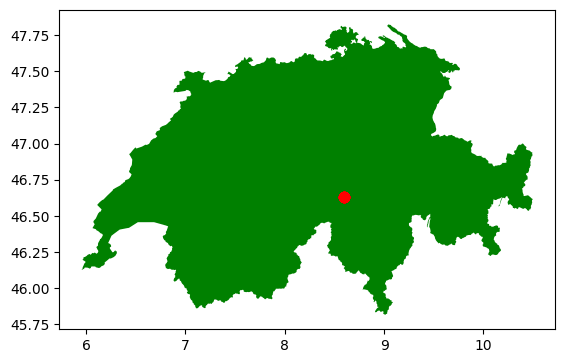

In [ ]:
# create a plot of GPS points on a map of Switzerland using GeoPandas and Matplotlib

fig, ax = plt.subplots()

SWITZ_map = gpd.read_file('CHE_adm0.shp')
SWITZ_map.plot(ax=ax, color="green")
# gps points data
for track in geo_df['Timestamp'].unique():
	geo_df[geo_df['Timestamp'] == track].plot(ax=ax,
             	                            markersize=50,
                                             color="red")
plt.title('GPS points on Switzerland region')
plt.xlabel("Long")
plt.ylabel("Lat")
plt.grid(True)
plt.show()

KeyboardInterrupt: 

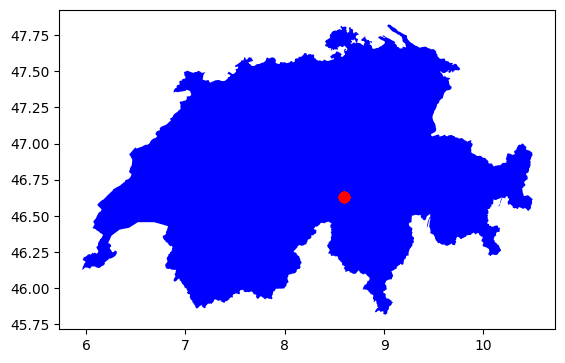

In [ ]:
fig, ax = plt.subplots()

SWITZ_map1 = gpd.read_file('CHE_adm0.shp')
SWITZ_map1.plot(ax=ax, color="blue")
# gps points data
for track in geo_df1['Timestamp'].unique():
	geo_df[geo_df1['Timestamp'] == track].plot(ax=ax,
             	                            markersize=50,
                                             color="red")
plt.title('GPS points on Switzerland region1')
plt.xlabel("Long")
plt.ylabel("Lat")
plt.grid(True)
plt.show()

**Clustering GPS data with DBScan**

In [ ]:

# Reduce data
sample_rate = 22 #
df_reduced = geo_df.iloc[range(0, len(geo_df), sample_rate)]

# GPS points as features
features = df_reduced[['Lat', 'Long']].to_numpy()

# Earth's radius in km and epsilon conversion
kms_per_radian = 6371.0088
epsilon = 0.1 / kms_per_radian

# DBSCAN model
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(features))

# Cluster labels and count
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))

# Output
print('Clustered ' + str(len(df_reduced)) + ' points to ' + str(num_clusters) + ' clusters')

# Corrected silhouette score calculation
print('Silhouette score:', silhouette_score(np.radians(features), labels=cluster_labels))


Clustered 260 points to 35 clusters
Silhouette score: 0.5602284647914907


In [ ]:

# Reduce data
sample_rate = 22 #
df_reduced1 = geo_df1.iloc[range(0, len(geo_df1), sample_rate)]

# GPS points as features
features1 = df_reduced1[['Lat', 'Long']].to_numpy()

# Earth's radius in km and epsilon conversion
kms_per_radian = 6371.0088
epsilon = 0.1 / kms_per_radian

# DBSCAN model
db1 = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(features1))

# Cluster labels and count
cluster_labels1 = db1.labels_
num_clusters1 = len(set(cluster_labels1))

# Output
print('Clustered ' + str(len(df_reduced1)) + ' points to ' + str(num_clusters1) + ' clusters')

# Corrected silhouette score calculation
print('Silhouette score1:', silhouette_score(np.radians(features1), labels=cluster_labels1))


Clustered 845 points to 42 clusters
Silhouette score1: -0.14779555795968485


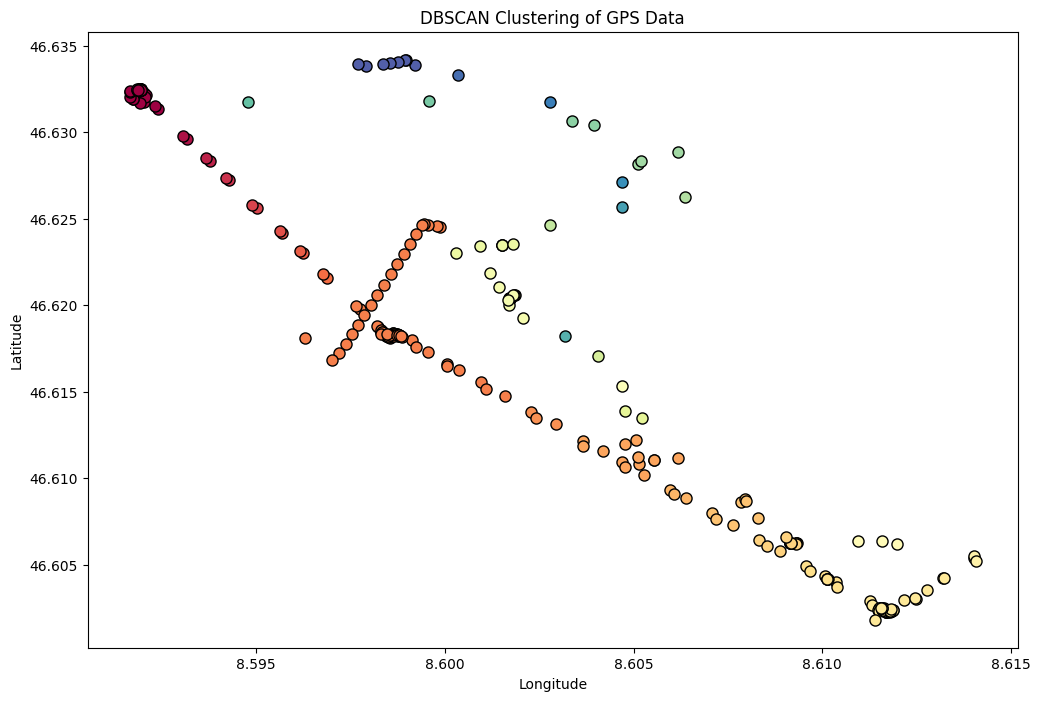

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set of unique cluster labels
unique_labels = set(cluster_labels)

# Iterate through the clusters and plot each cluster
for label in unique_labels:
    # Select data points belonging to the current cluster
    class_member_mask = (cluster_labels == label)
    xy = features[class_member_mask]

    # Choose a color for the cluster
    if label == -1:
        # Black color for noise
        color = 'k'
    else:
        # Other clusters in different colors
        color = plt.cm.Spectral(float(label) / len(unique_labels))

    # Plot the points
    ax.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=color, markeredgecolor='k', markersize=8)

# Labeling
ax.set_title('DBSCAN Clustering of GPS Data')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


In [ ]:

# Calculate the mean latitude and longitude for the center of the map
mean_lat = np.mean(features[:, 0])
mean_lon = np.mean(features[:, 1])

# Create a Folium map
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=12)

# Colors for clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(cluster_labels))))

# Plot each point on the map
for lat, lon, cluster in zip(features[:, 0], features[:, 1], cluster_labels):
    folium.CircleMarker(location=[lat, lon],
                        radius=5,
                        color=matplotlib.colors.rgb2hex(colors[cluster]),
                        fill=True,
                        fill_color=matplotlib.colors.rgb2hex(colors[cluster]),
                        fill_opacity=0.7).add_to(m)

# Display the map
m


# ***Find the optimal number of clusters***

**Silhouette**

In [ ]:
df = df_95_clean_1.drop(columns='Timestamp')
#df_scaled['Timestamp'] = pd.to_datetime(df_scaled['Timestamp'])


For n_clusters = 2 The average silhouette_score is : 0.5263
For n_clusters = 3 The average silhouette_score is : 0.6261
For n_clusters = 4 The average silhouette_score is : 0.5528
For n_clusters = 5 The average silhouette_score is : 0.4346
For n_clusters = 6 The average silhouette_score is : 0.3864
For n_clusters = 7 The average silhouette_score is : 0.3498
For n_clusters = 8 The average silhouette_score is : 0.3531
For n_clusters = 9 The average silhouette_score is : 0.3605
For n_clusters = 10 The average silhouette_score is : 0.3603
For n_clusters = 11 The average silhouette_score is : 0.3424
For n_clusters = 12 The average silhouette_score is : 0.3314
For n_clusters = 13 The average silhouette_score is : 0.3485
For n_clusters = 14 The average silhouette_score is : 0.3485
For n_clusters = 15 The average silhouette_score is : 0.3615


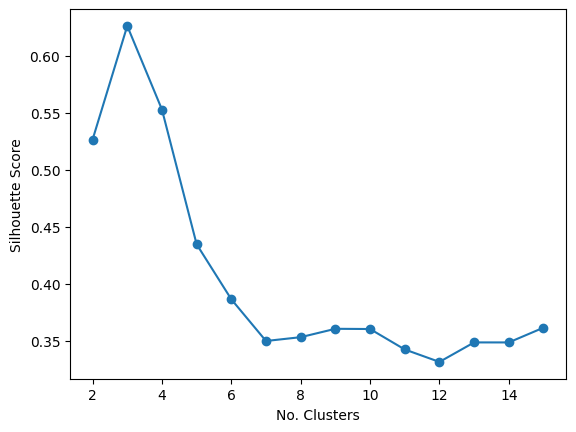

In [ ]:
silhouette_s = []

for n_clusters in range(2, 16):
    kmeans_pipeline = Pipeline([
        #("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters))])

    cluster_labels = kmeans_pipeline.fit_predict(df)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(df, cluster_labels).round(4))
    silhouette_s.append(silhouette_score(df, cluster_labels))

plt.plot(range(2, 16),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.148
For n_clusters = 3 The average silhouette_score is : -0.0041
For n_clusters = 4 The average silhouette_score is : -0.0242
For n_clusters = 5 The average silhouette_score is : -0.0469
For n_clusters = 6 The average silhouette_score is : -0.0757
For n_clusters = 7 The average silhouette_score is : -0.072
For n_clusters = 8 The average silhouette_score is : -0.0638
For n_clusters = 9 The average silhouette_score is : -0.212
For n_clusters = 10 The average silhouette_score is : -0.2268
For n_clusters = 11 The average silhouette_score is : -0.1866
For n_clusters = 12 The average silhouette_score is : -0.3375
For n_clusters = 13 The average silhouette_score is : -0.223
For n_clusters = 14 The average silhouette_score is : -0.1811
For n_clusters = 15 The average silhouette_score is : -0.3




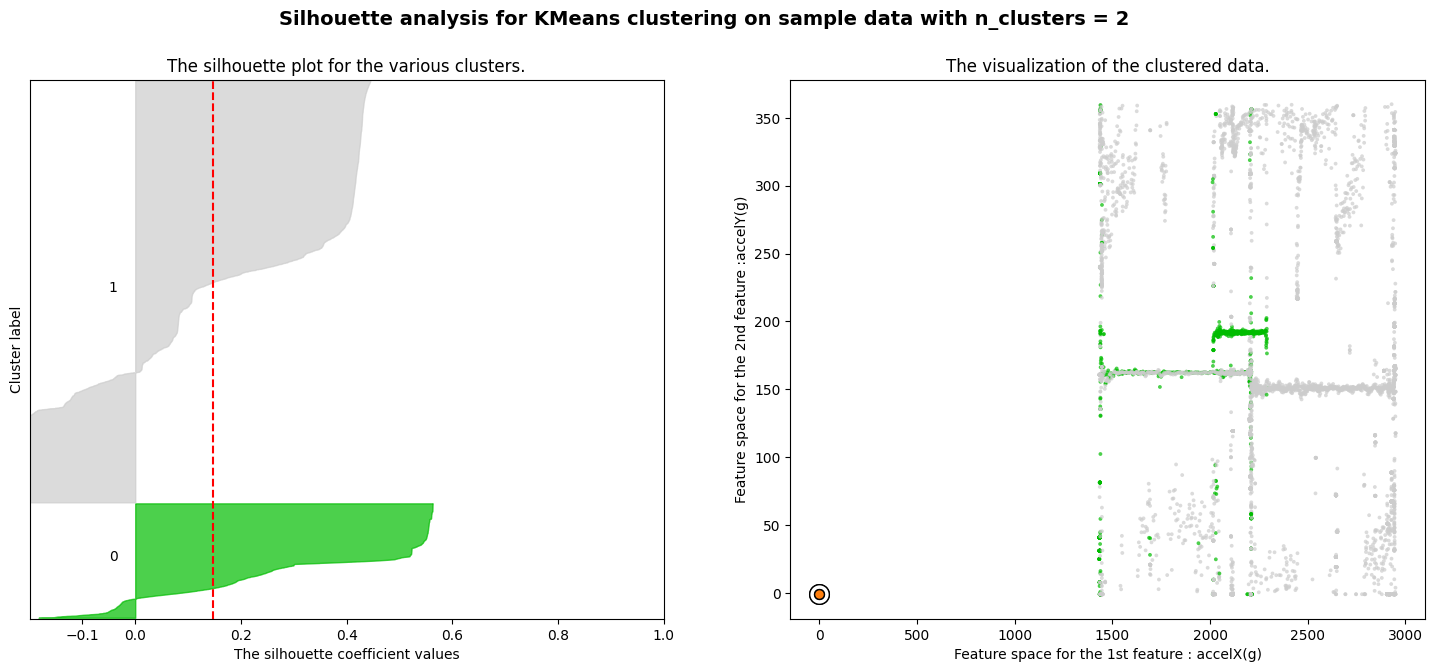

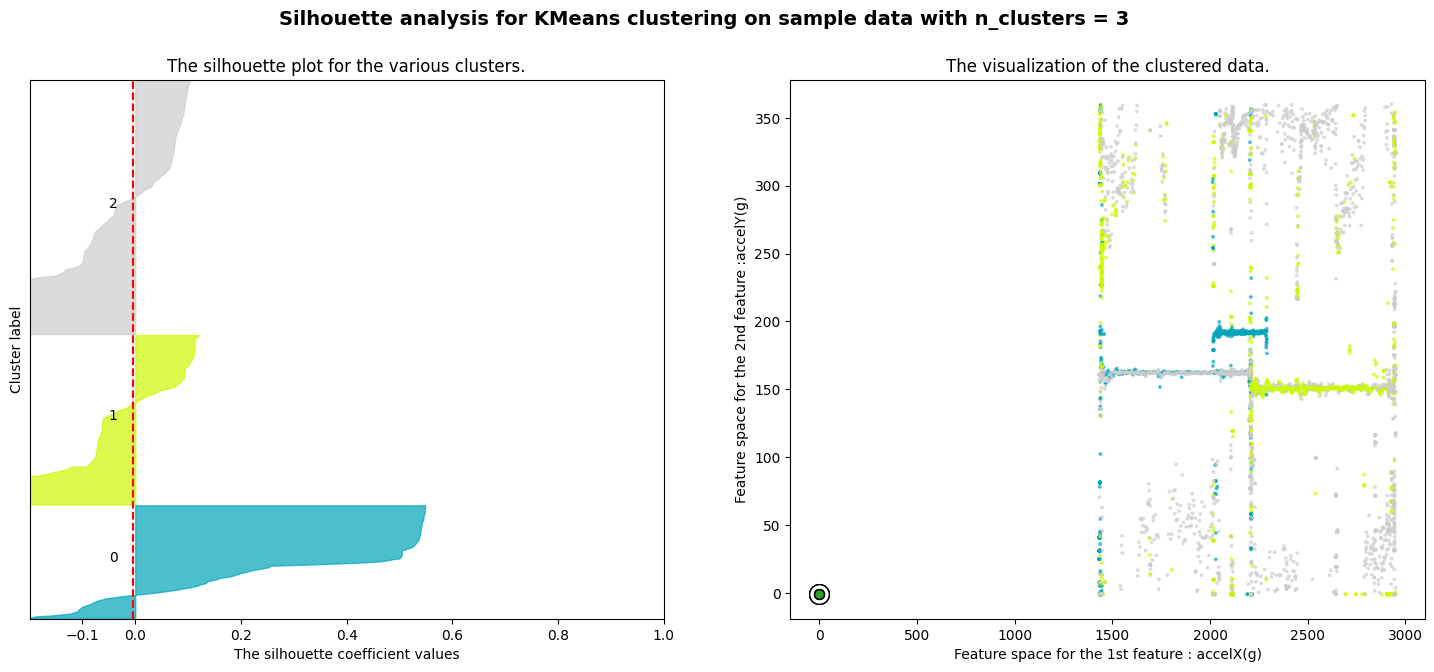

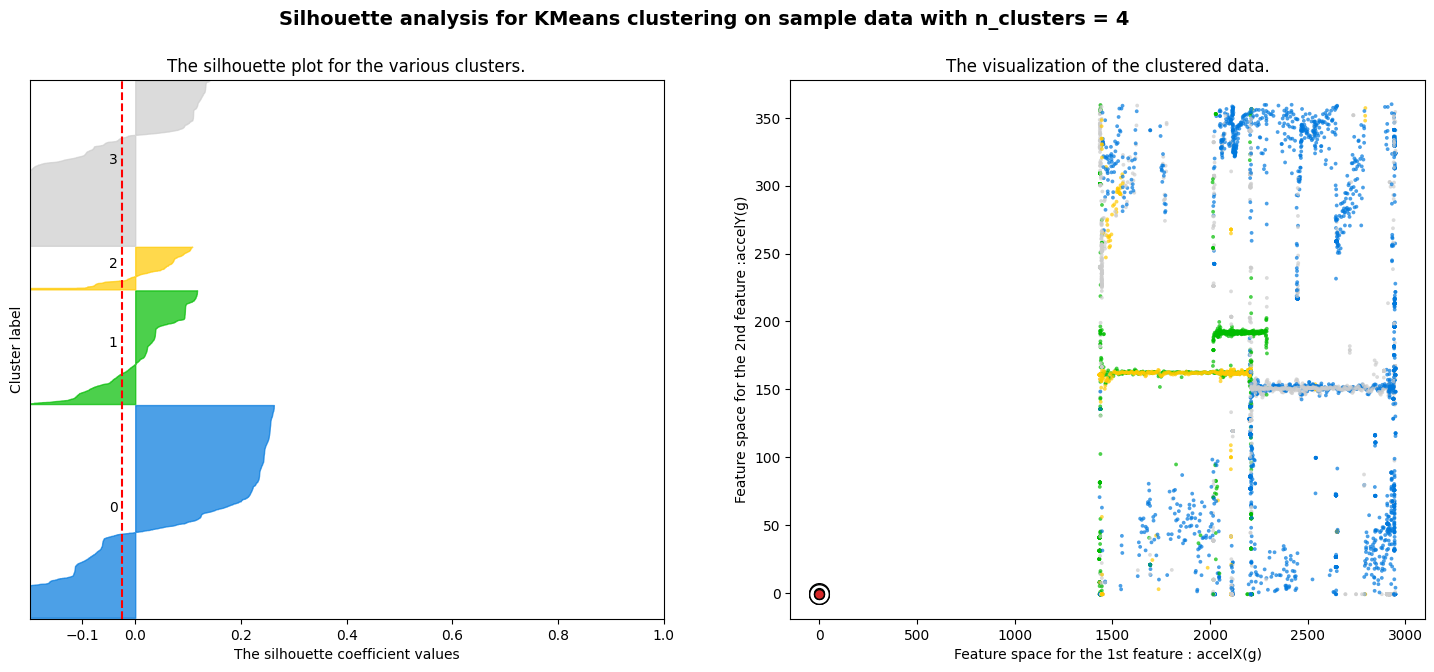

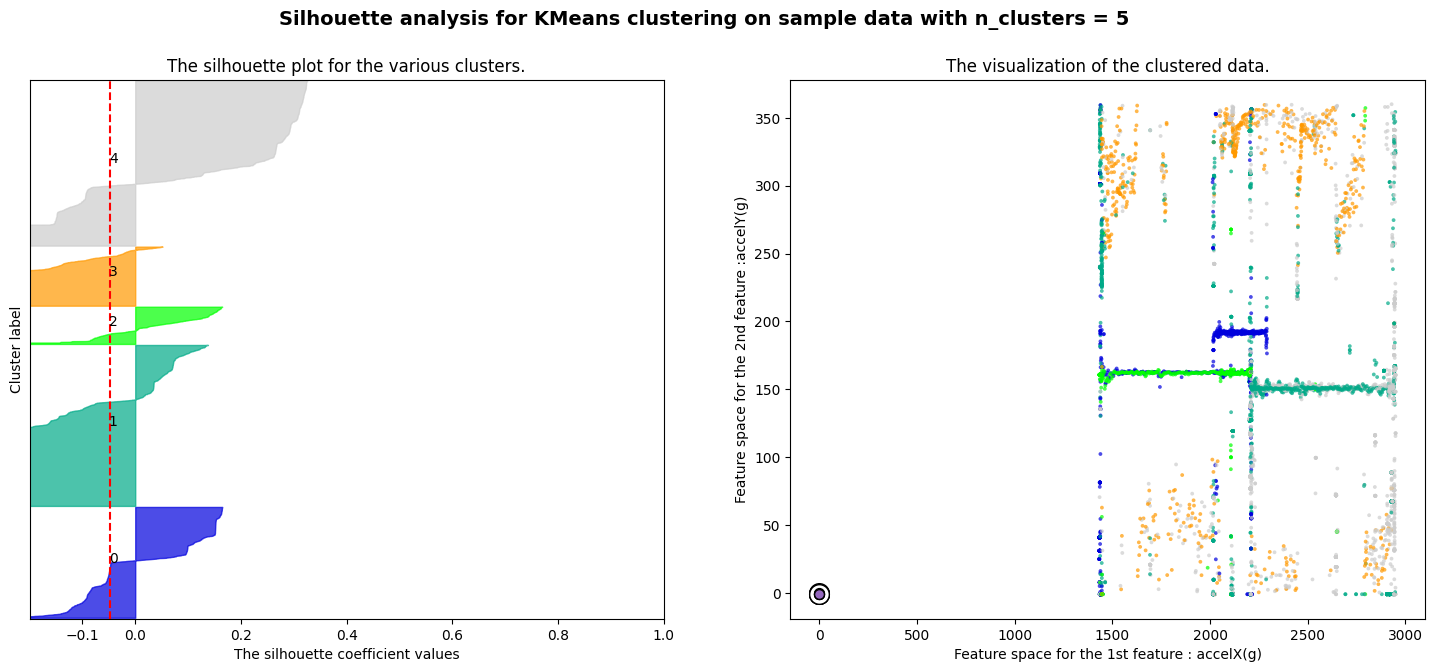

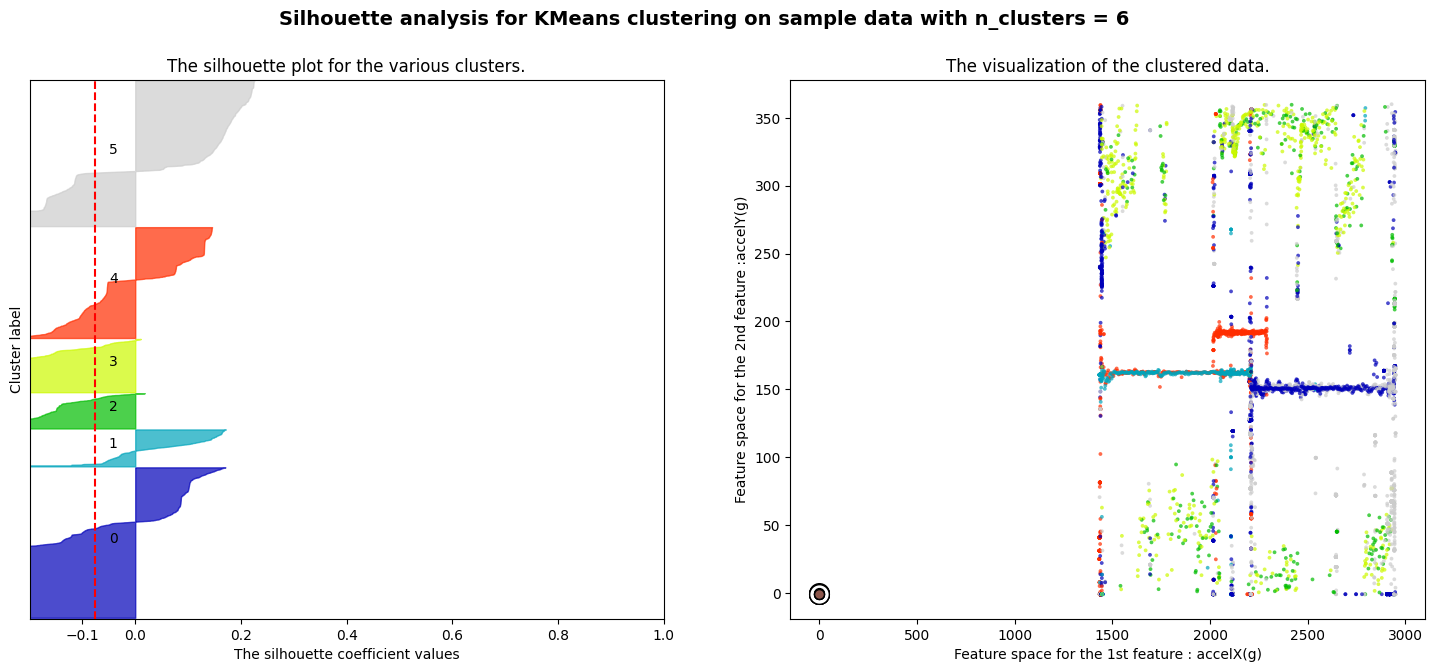

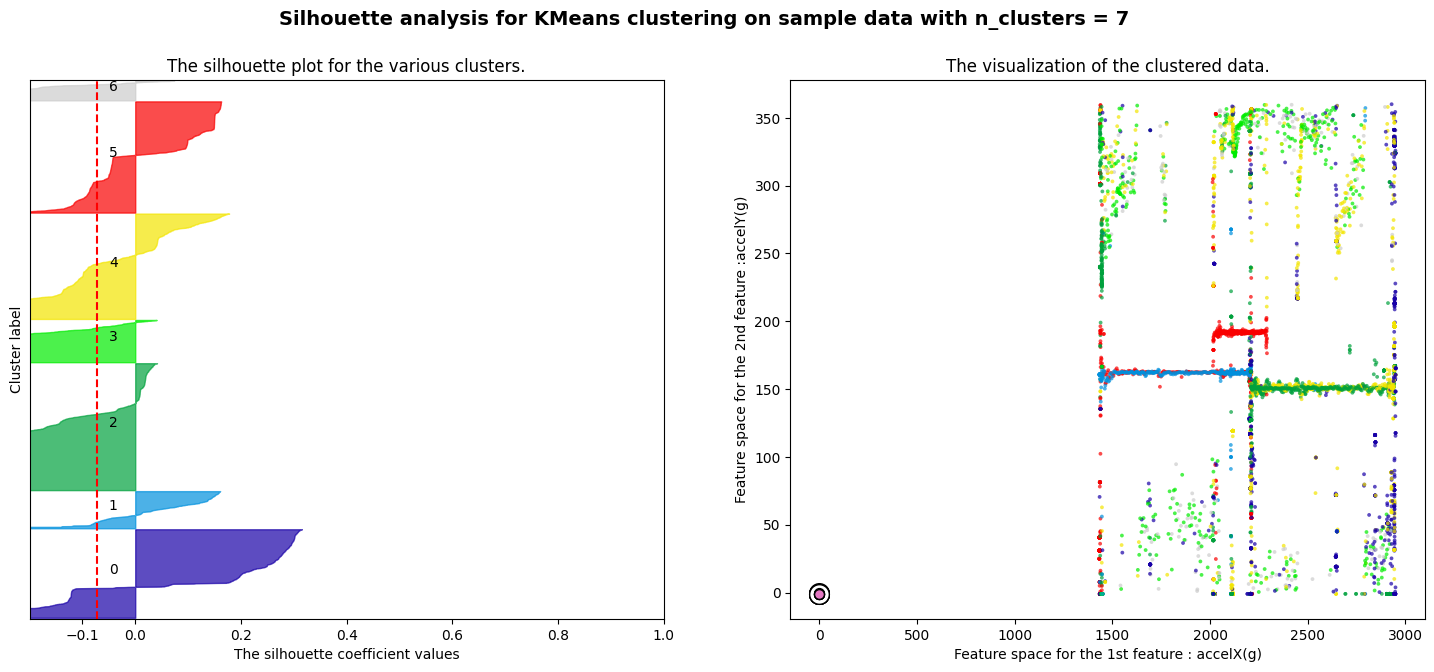

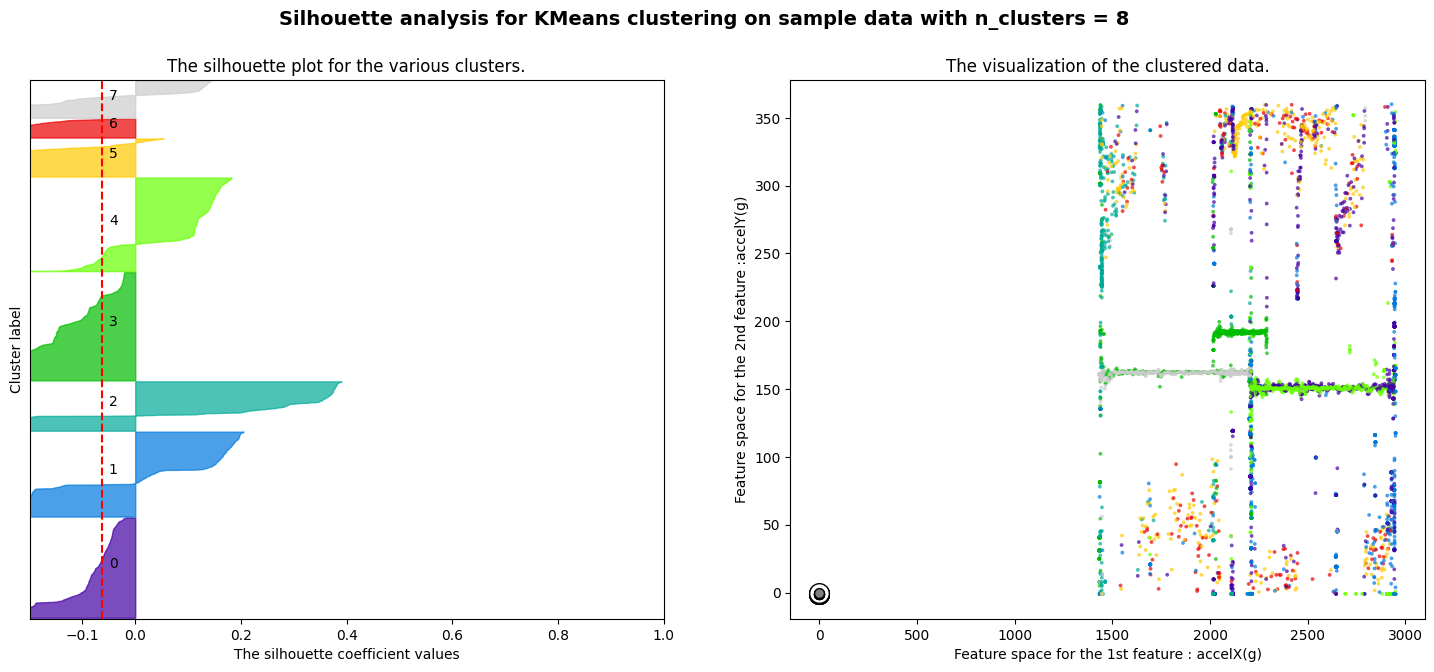

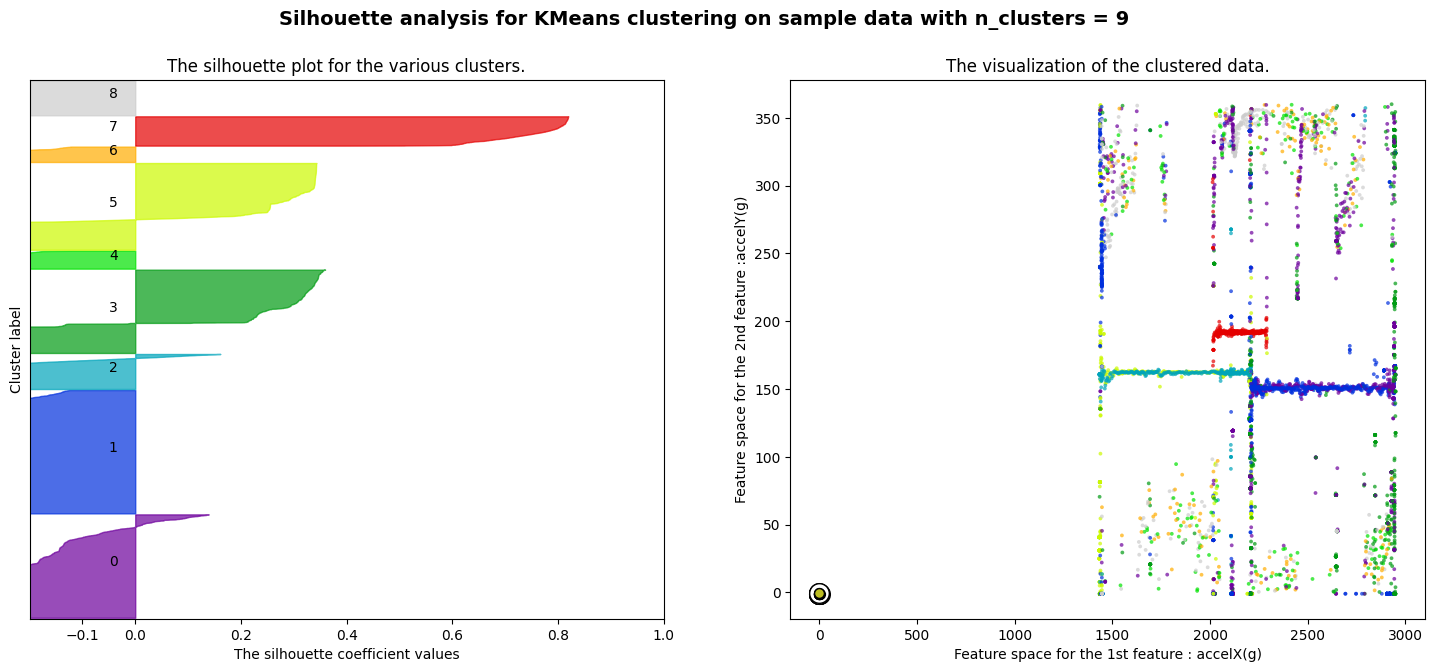

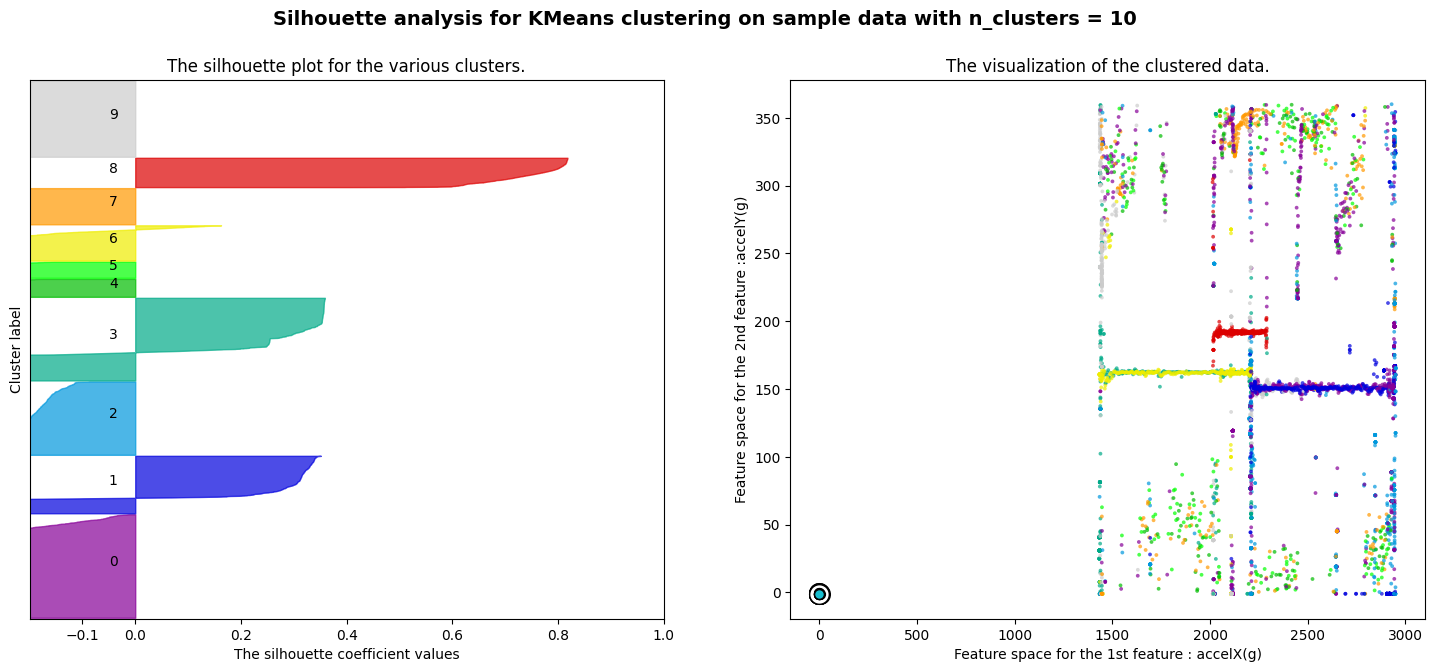

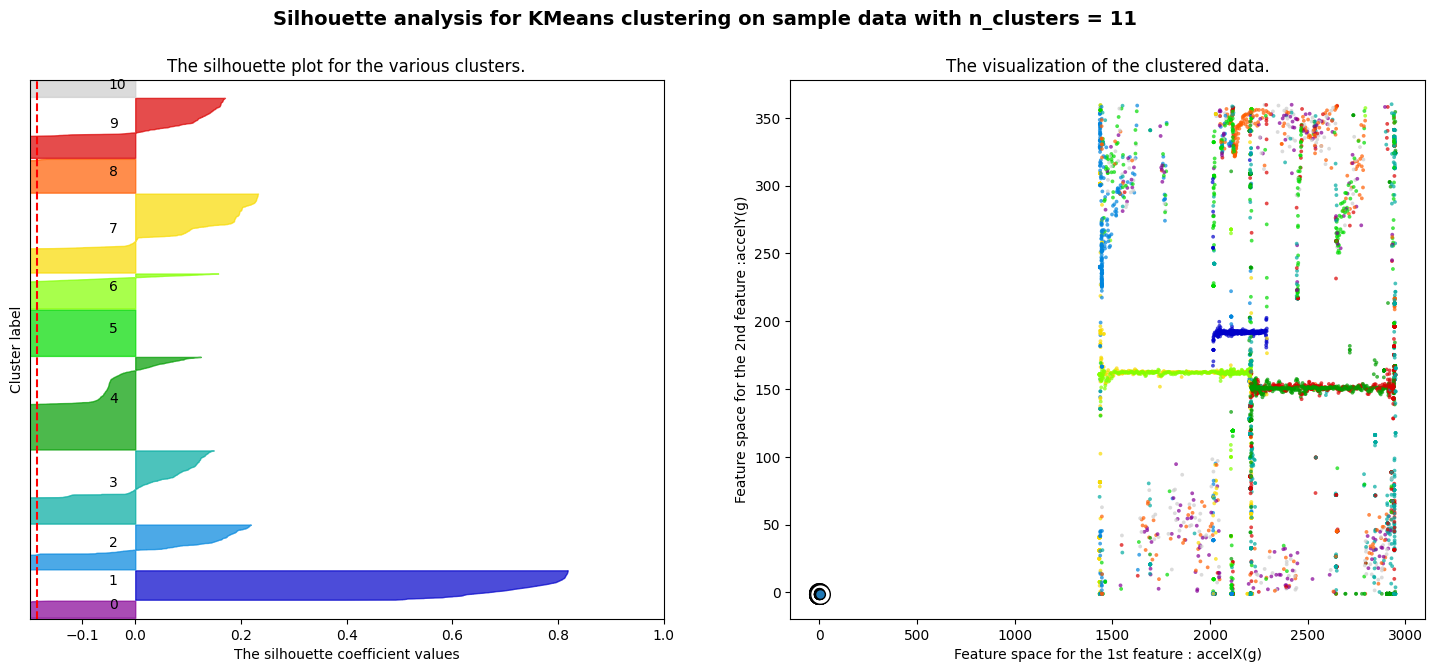

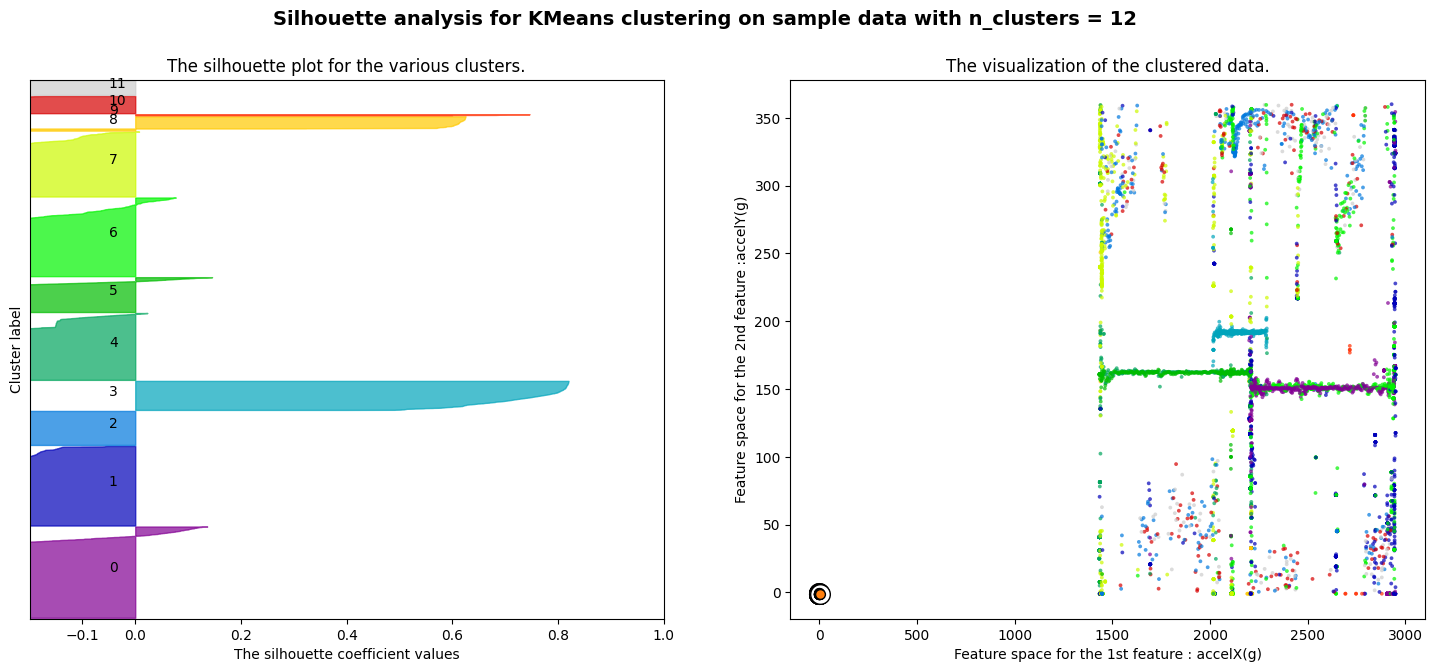

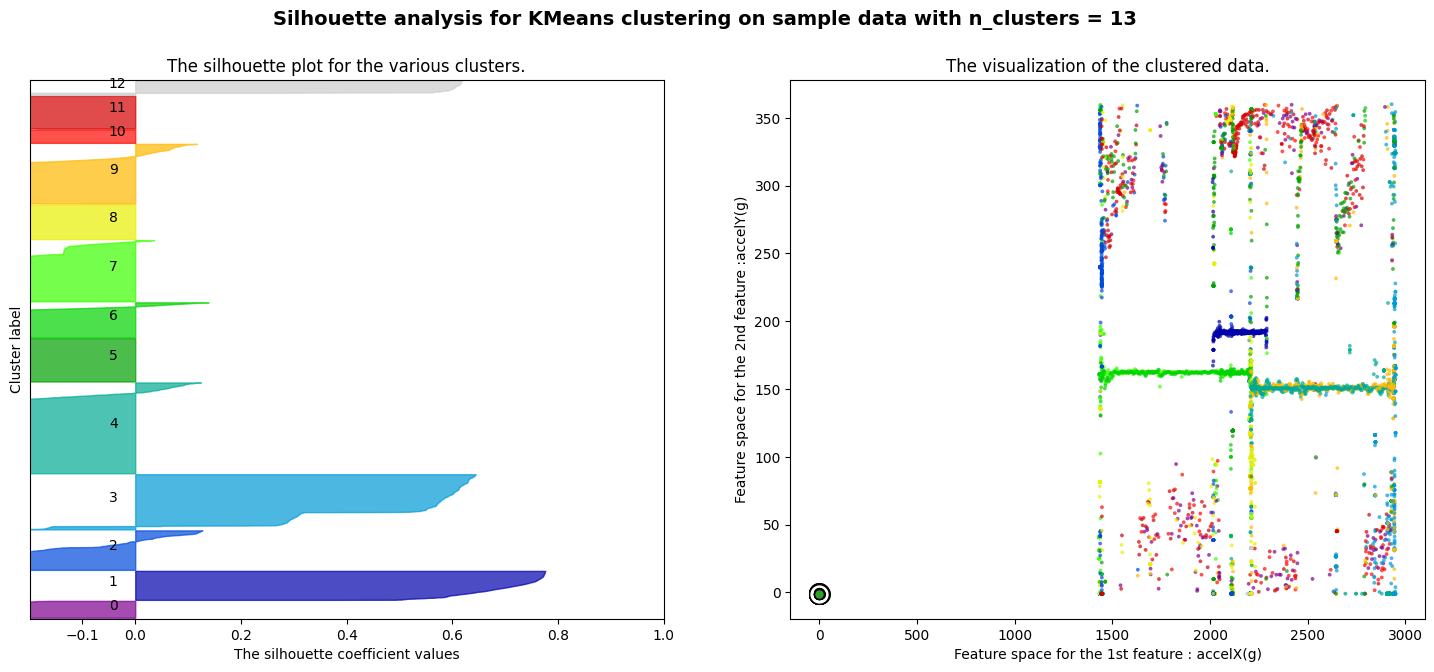

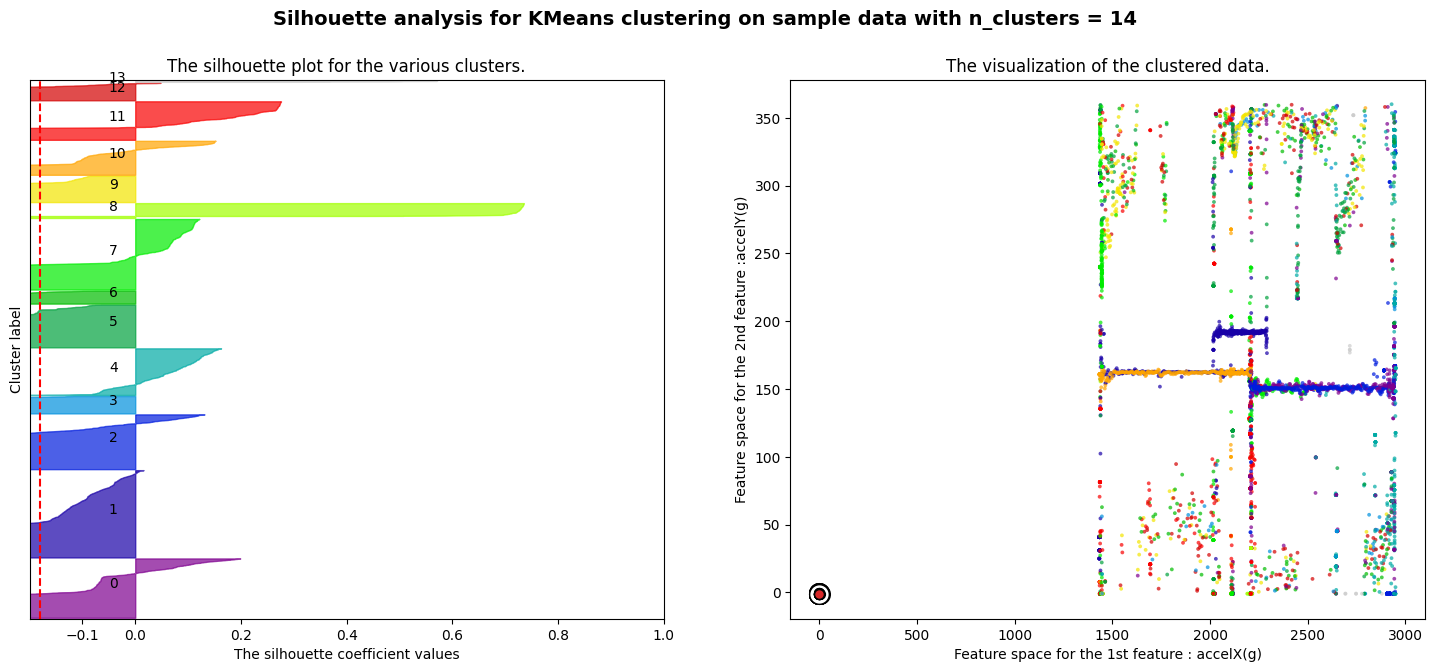

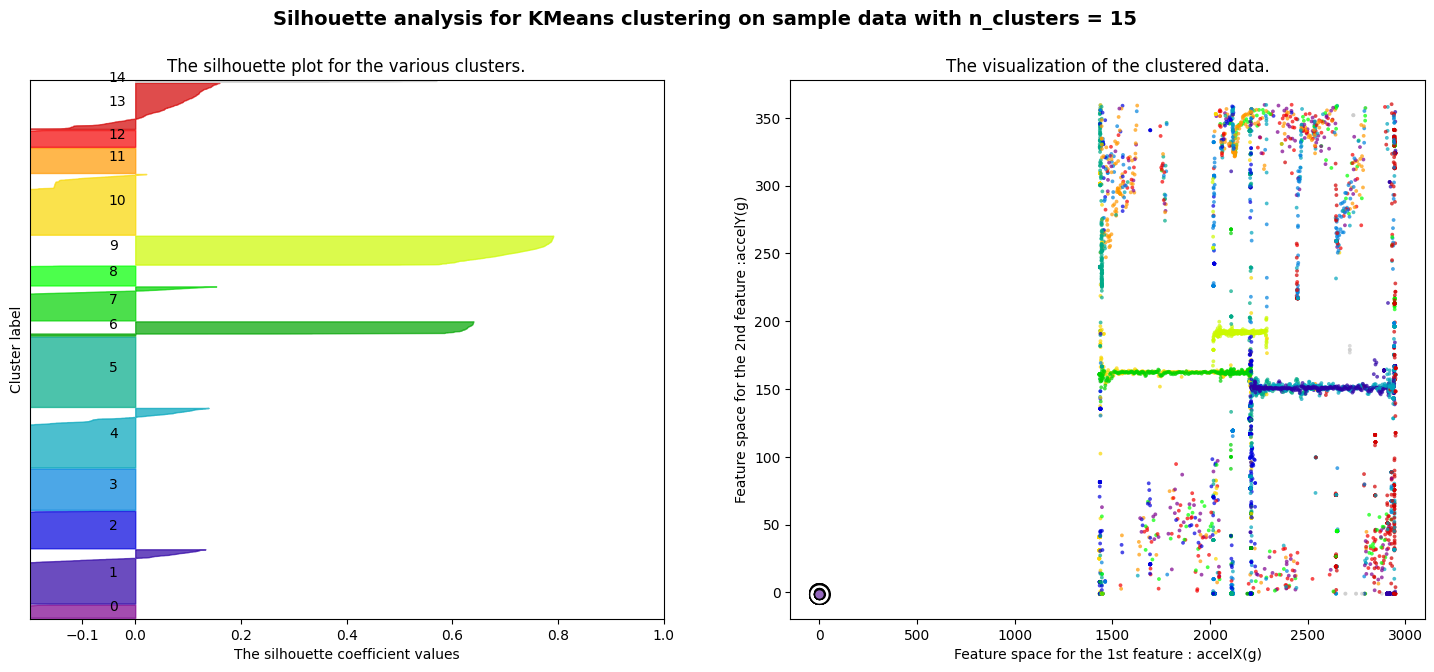

In [ ]:
''' Note: The code below is directly took from sklearn documentation of silhoutte analysis.
          And so you do not have to spend time trying to understand the code'''

range_n_clusters = range(2, 16)

r_seed = 11

cols = df.columns

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the Pipeline with n_clusters value and a random generator seed for reproducibility.
    kmeans_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])

    cluster_labels = kmeans_pipeline.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg.round(4))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i + 1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / n_clusters)
    ax2.scatter(df['Alt(m)'],
                df['Course'],
                marker=".",
                s=30,
                lw=0,
                alpha=0.7,
                c=colors,
                edgecolor="k")

    # Labeling the clusters
    pipeline_centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
    centers = kmeans_pipeline.named_steps["scaler"].inverse_transform(pipeline_centers)
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature : " + cols[0])
    ax2.set_ylabel("Feature space for the 2nd feature :" + cols[1])

    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data "
            "with n_clusters = %d" % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
plt.show()

In [ ]:
kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=3, random_state=11, verbose=0))])

kmeans_pipeline.fit(df)
clusters = kmeans_pipeline.predict(df)
df['Cluster'] = clusters
df.head()

accelX(g)  accelY(g)  accelZ(g)  accelUserX(g)  accelUserY(g)  \
0     0.1534    -0.5180    -0.8395        -0.0108         0.0025   
1     0.1562    -0.5118    -0.8333        -0.0094         0.0023   
2     0.1508    -0.5035    -0.8493        -0.0059         0.0053   
3     0.1604    -0.5134    -0.8229        -0.0070         0.0025   
4     0.1569    -0.5341    -0.8330         0.0065        -0.0080   

   accelUserZ(g)  gyroX(rad/s)  gyroY(rad/s)  gyroZ(rad/s)     m11  ...  \
0        -0.0101        0.0166        0.0051        0.0318 -0.9238  ...   
1         0.0054        0.0042        0.0032       -0.0066 -0.9290  ...   
2        -0.0014        0.0020        0.0021        0.0225 -0.9287  ...   
3         0.0136        0.0594        0.0147        0.0097 -0.9276  ...   
4         0.0061       -0.0024        0.0176        0.0147 -0.9179  ...   

   VerticalAccuracy(m)  Course  RelativeAltitude(meters)  magX(µT)  magY(µT)  \
0                  3.9    -1.0                   -0.0343 -135.5536   36.2744   
1                  3.9    -1.0                   -0.0264 -135.1368   36.0763   
2                  3.9    -1.0                   -0.0184 -135.6325   36.4408   
3                  3.9    -1.0                   -0.0184 -135.1522   36.4185   
4                  3.9    -1.0                   -0.0184 -136.8931   36.2061   

   magZ(µT)  calMagX(µT)  calMagY(µT)  calMagZ(µT)  Cluster  
0  -65.9999     -27.1108       6.9614      -7.9447        0  
1  -66.4066     -26.8162       7.0748      -8.5435        0  
2  -67.0690     -27.0917       7.1687      -9.2339        0  
3  -66.2895     -26.4431       7.0141      -7.9350        0  
4  -66.0967     -28.3148       7.0149      -8.3881        0  

[5 rows x 38 columns]

In [ ]:
# the clusters in percentages

df['Cluster'].value_counts(normalize=True) *100

2    47.332517
1    31.642470
0    21.025013
Name: Cluster, dtype: float64

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 3 dimensions
pca = PCA()
principal_components = pca.fit_transform(df)

# Create a DataFrame with the principal components
#df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Display the first few rows of the new DataFrame
#print(df_pca.head())

In [ ]:
pca.explained_variance_ratio_.cumsum() #cummulative pca values

array([0.94730585, 0.97427868, 0.99422845, 0.99703129, 0.99853711,
       0.99946144, 0.99966489, 0.99982369, 0.99994797, 0.99999152,
       0.99999358, 0.9999952 , 0.99999616, 0.99999688, 0.99999751,
       0.99999799, 0.99999841, 0.99999879, 0.99999899, 0.99999917,
       0.99999933, 0.99999949, 0.99999962, 0.99999972, 0.9999998 ,
       0.99999987, 0.99999991, 0.99999994, 0.99999996, 0.99999998,
       0.99999999, 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [ ]:
df_pca_new = pd.DataFrame({"feat_1": df.dot(pca.components_[0]),
              "feat_2": df.dot(pca.components_[1]),
              "feat_3": df.dot(pca.components_[6])})
df_pca_new

feat_1      feat_2      feat_3
0    -1005.912995   24.589294 -709.684012
1    -1006.229254   25.353826 -710.026541
2    -1006.521403   25.297856 -709.800839
3    -1006.477918   25.340503 -709.760332
4    -1006.451802   24.238256 -709.558379
...           ...         ...         ...
5712 -1021.009028  452.214802 -691.309917
5713 -1020.582131  457.030231 -690.739224
5714 -1020.256252  467.981422 -690.368305
5715 -1019.973313  457.663936 -691.004258
5716 -1019.815271  445.121845 -693.512538

[5717 rows x 3 columns]

For n_clusters = 2 The average silhouette_score is : 0.4222
For n_clusters = 3 The average silhouette_score is : 0.2602
For n_clusters = 4 The average silhouette_score is : 0.0476
For n_clusters = 5 The average silhouette_score is : -0.0628
For n_clusters = 6 The average silhouette_score is : -0.0341
For n_clusters = 7 The average silhouette_score is : 0.0389


Text(0, 0.5, 'Silhouette Score')

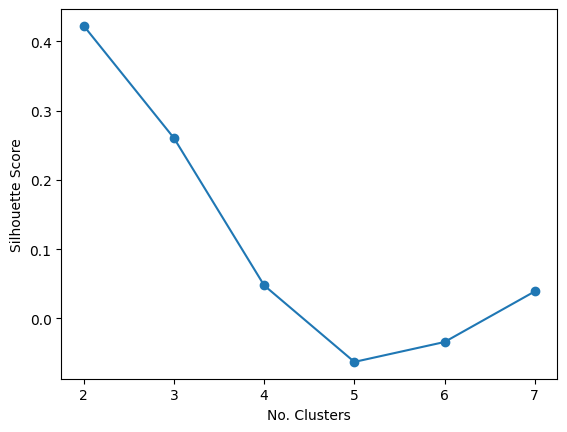

In [ ]:
silhouette_s = []

for n_clusters in range(2, 8):
    kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=11, verbose=0))])

    cluster_labels = kmeans_pipeline.fit_predict(df_pca_new)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(df_pca_new, cluster_labels).round(4))
    silhouette_s.append(silhouette_score(df_pca_new, cluster_labels))

plt.plot(range(2, 8),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")

For n_clusters = 2 The average silhouette_score is : 0.4222
For n_clusters = 3 The average silhouette_score is : 0.2665
For n_clusters = 4 The average silhouette_score is : 0.0457
For n_clusters = 5 The average silhouette_score is : -0.0619




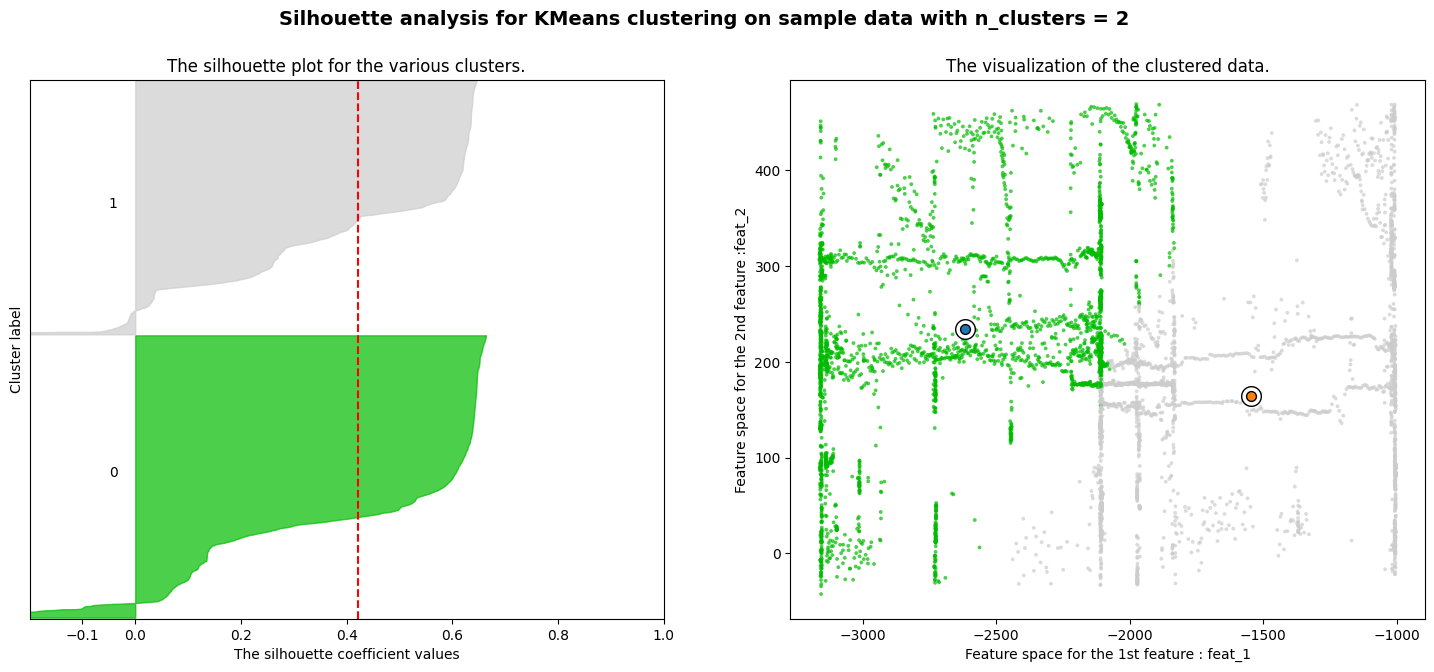

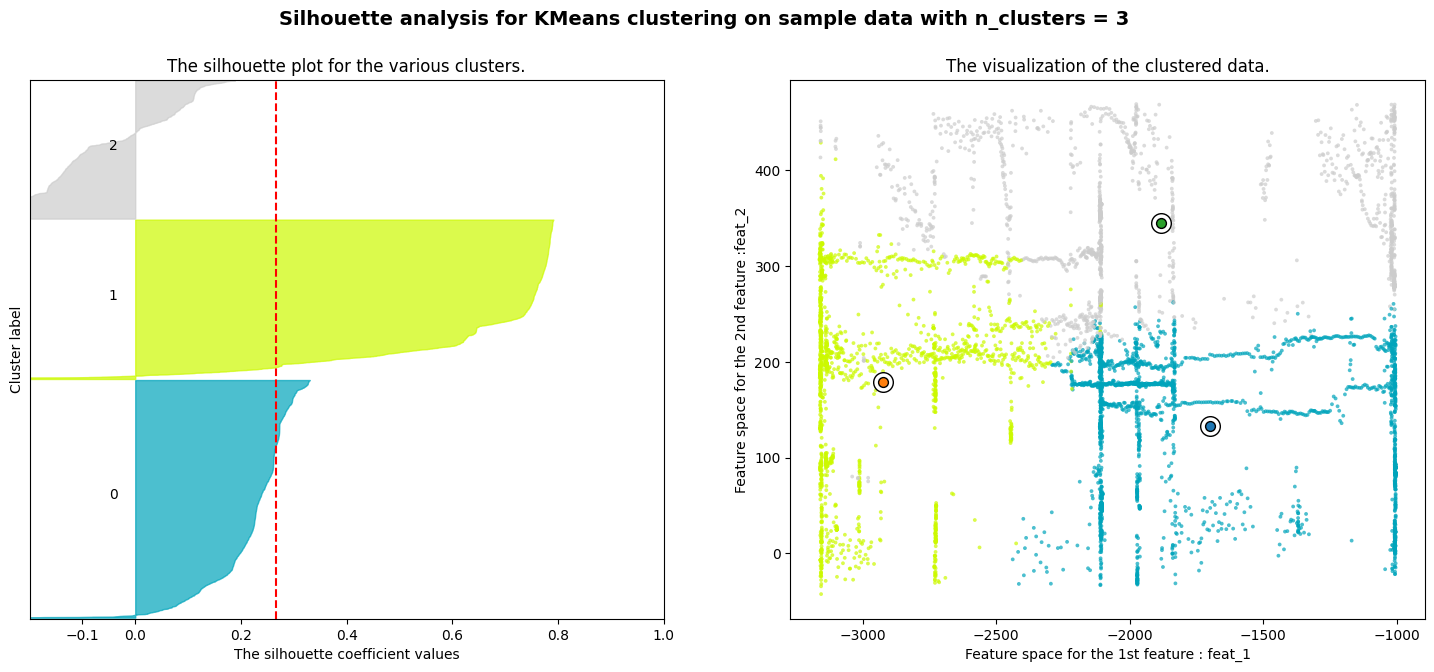

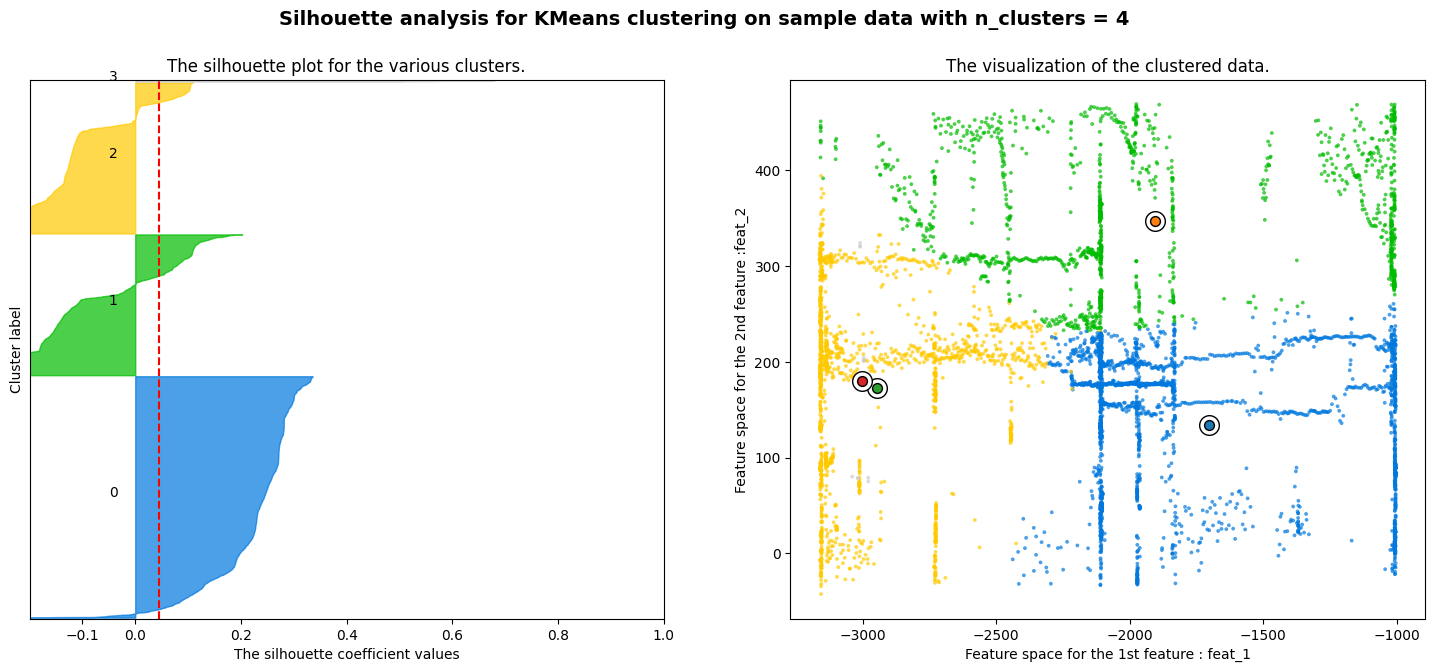

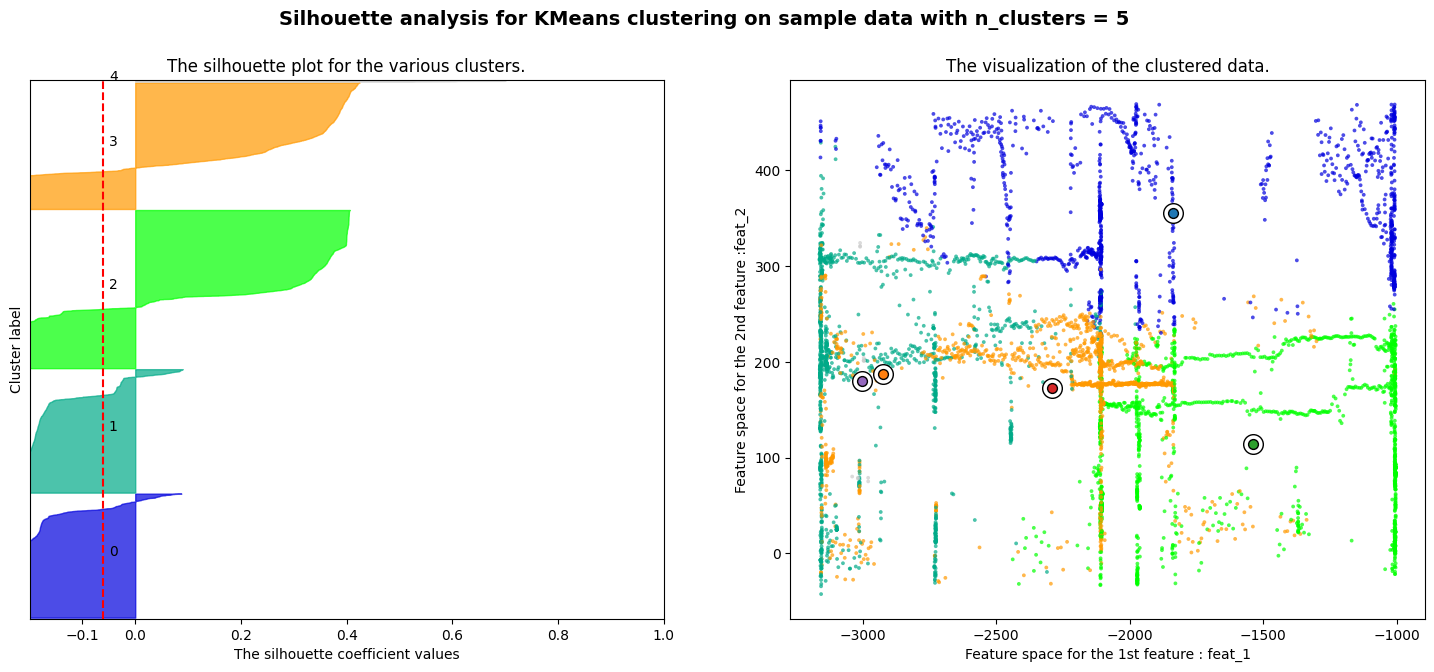

In [ ]:
''' Note: The code below is directly took from sklearn documentation of silhoutte analysis.'''

range_n_clusters = range(2, 6)

r_seed = 17

cols = df_pca_new.columns
X = df_pca_new.to_numpy()

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the Pipeline with n_clusters value and a random generator seed for reproducibility.
    kmeans_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])

    cluster_labels = kmeans_pipeline.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg.round(4))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i + 1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / n_clusters)
    ax2.scatter(X[:, 0],
                X[:, 1],
                marker=".",
                s=30,
                lw=0,
                alpha=0.7,
                c=colors,
                edgecolor="k")

    # Labeling the clusters
    pipeline_centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
    centers = kmeans_pipeline.named_steps["scaler"].inverse_transform(pipeline_centers)
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature : " + cols[0])
    ax2.set_ylabel("Feature space for the 2nd feature :" + cols[1])

    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data "
            "with n_clusters = %d" % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
plt.show()

In [ ]:
kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=3, random_state=17, verbose=0))])

clusters = kmeans_pipeline.fit_predict(df_pca_new)
df_pca_new['cluster'] = clusters
df_pca_new.head() # Data with 4 transformed features (that explain 90% of variance) along with the cluster prediction

feat_1     feat_2      feat_3  cluster
0 -1005.912995  24.589294 -709.684012        0
1 -1006.229254  25.353826 -710.026541        0
2 -1006.521403  25.297856 -709.800839        0
3 -1006.477918  25.340503 -709.760332        0
4 -1006.451802  24.238256 -709.558379        0

In [ ]:
loadings_df=pd.DataFrame(loadings, columns=df.columns)
loadings_df


accelX(g)  accelY(g)  accelZ(g)  accelUserX(g)  accelUserY(g)  \
0  -0.000028   0.000025  -0.000064   6.192576e-08       0.000006   
1   0.000329   0.000042  -0.000258   1.399043e-04      -0.000005   
2  -0.000244   0.000201  -0.000452  -1.889848e-04       0.000004   

   accelUserZ(g)  gyroX(rad/s)  gyroY(rad/s)  gyroZ(rad/s)       m11  ...  \
0      -0.000008      0.000006     -0.000004  7.634982e-08 -0.000112  ...   
1       0.000025     -0.000027      0.000193  4.109906e-05  0.002919  ...   
2      -0.000047      0.000046     -0.000137  2.128606e-05 -0.002584  ...   

   VerticalAccuracy(m)    Course  RelativeAltitude(meters)  magX(µT)  \
0            -0.000134 -0.004253                 -0.713447 -0.005418   
1            -0.000454  0.702675                 -0.002573  0.067765   
2            -0.000053  0.710058                  0.001739 -0.053046   

   magY(µT)  magZ(µT)  calMagX(µT)  calMagY(µT)  calMagZ(µT)   Cluster  
0  0.000106  0.000768    -0.002807    -0.004289    -0.000761 -0.000449  
1 -0.000828 -0.019280     0.079494    -0.019168    -0.025420  0.001185  
2  0.006134 -0.012581    -0.056514     0.011315    -0.010929 -0.000047  

[3 rows x 38 columns]

In [ ]:
# List with Features:
features = list(df.columns)

# Setting up the content of variable 'X':
X = df.loc[:,features].values


In [ ]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(X)
x = pca_features[:,0]
y = pca_features[:,1]

K=3

kmeans = KMeans(n_clusters=K, random_state=11, n_init=1000, max_iter=10000)
cl_labels = kmeans.fit_predict(X)
df_pca_features = pd.DataFrame({'cluster_id': cl_labels,
                                'pc_1':x,
                                'pc_2':y})
df_pca_features

cluster_id         pc_1        pc_2
0              1  1104.391452 -176.521264
1              1  1104.075193 -175.756732
2              1  1103.783044 -175.812702
3              1  1103.826528 -175.770055
4              1  1103.852645 -176.872302
...          ...          ...         ...
5712           1  1089.295419  251.104244
5713           1  1089.722315  255.919673
5714           1  1090.048194  266.870863
5715           1  1090.331134  256.553378
5716           1  1090.489176  244.011287

[5717 rows x 3 columns]